# CREMA

## Imports and downloading dataset

In [ ]:
import os
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import numpy as np
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.layers import Dense
import tensorflow
import tensorflow.keras
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, LeakyReLU
from keras.utils import np_utils
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

import keras
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization,MaxPooling1D,GlobalMaxPooling1D
import seaborn as sns
import random
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
from keras import backend as K
K._get_available_gpus()

['/device:GPU:0']

In [ ]:
from google.colab import drive

drive.mount("/content/drive")
DATASET_PATH = "/content/drive/MyDrive/Kaggle_ds/Crema/"

Mounted at /content/drive


In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content/drive/MyDrive/Kaggle_ds"

In [ ]:
if not os.path.exists("/content/drive/MyDrive/Kaggle_ds/"):
    os.makedirs("/content/drive/MyDrive/Kaggle_ds/")

In [ ]:
if len(os.listdir(os.environ["KAGGLE_CONFIG_DIR"])) == 1:
    !kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en -p /content/drive/MyDrive/Kaggle_ds --unzip

In [ ]:
%ls DATASET_PATH

1001_DFA_ANG_XX.wav  1031_IWL_ANG_XX.wav  1061_TAI_HAP_XX.wav
1001_DFA_DIS_XX.wav  1031_IWL_DIS_XX.wav  1061_TAI_NEU_XX.wav
1001_DFA_FEA_XX.wav  1031_IWL_FEA_XX.wav  1061_TAI_SAD_XX.wav
1001_DFA_HAP_XX.wav  1031_IWL_HAP_XX.wav  1061_TIE_ANG_XX.wav
1001_DFA_NEU_XX.wav  1031_IWL_NEU_XX.wav  1061_TIE_DIS_XX.wav
1001_DFA_SAD_XX.wav  1031_IWL_SAD_XX.wav  1061_TIE_FEA_XX.wav
1001_IEO_ANG_HI.wav  1031_IWW_ANG_XX.wav  1061_TIE_HAP_XX.wav
1001_IEO_ANG_LO.wav  1031_IWW_DIS_XX.wav  1061_TIE_NEU_XX.wav
1001_IEO_ANG_MD.wav  1031_IWW_FEA_XX.wav  1061_TIE_SAD_XX.wav
1001_IEO_DIS_HI.wav  1031_IWW_HAP_XX.wav  1061_TSI_ANG_XX.wav
1001_IEO_DIS_LO.wav  1031_IWW_NEU_XX.wav  1061_TSI_DIS_XX.wav
1001_IEO_DIS_MD.wav  1031_IWW_SAD_XX.wav  1061_TSI_FEA_XX.wav
1001_IEO_FEA_HI.wav  1031_MTI_ANG_XX.wav  1061_TSI_HAP_XX.wav
1001_IEO_FEA_LO.wav  1031_MTI_DIS_XX.wav  1061_TSI_NEU_XX.wav
1001_IEO_FEA_MD.wav  1031_MTI_FEA_XX.wav  1061_TSI_SAD_XX.wav
1001_IEO_HAP_HI.wav  1031_MTI_HAP_XX.wav  1061_WSI_ANG_XX.wav
1001_IEO

In [ ]:
# Get all filenames into a list
dir_list: list[str] = os.listdir(DATASET_PATH)
dir_list.sort()
dir_list[:5]

['1001_DFA_ANG_XX.wav',
 '1001_DFA_DIS_XX.wav',
 '1001_DFA_FEA_XX.wav',
 '1001_DFA_HAP_XX.wav',
 '1001_DFA_NEU_XX.wav']

In [ ]:
emotion_mapping: dict[str, str] = {
    "SAD": "sad",
    "ANG": "angry",
    "DIS": "disgust",
    "FEA": "fear",
    "HAP": "happy",
    "NEU": "neutral",
}
female_ids: list[int] = [
    1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,
    1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,1052,1053,1054,
    1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,
    1082,1084,1089,1091,
]


def get_labels_crema(
    file_list, mapping, female_ids
) -> tuple[list[str], list[str], list[str]]:
    emotion: list[str] = []
    gender: list[str] = []
    path: list[str] = []

    for filename in file_list:
        path.append(filename)
        filename = filename.split("_")
        emotion.append(mapping[filename[2]])
        gender.append("female" if int(filename[0]) in female_ids else "male")
    return emotion, gender, path


emotion, gender, path = get_labels_crema(
    dir_list, mapping=emotion_mapping, female_ids=female_ids
)

In [ ]:
CREMA_df = pd.DataFrame(emotion, columns=["emotion"])
CREMA_df = pd.concat([CREMA_df, pd.DataFrame(gender, columns=["gender"])], axis=1)
CREMA_df = pd.concat([CREMA_df, pd.DataFrame(path, columns=["path"])], axis=1)
CREMA_df["source"] = "CREMA"

In [ ]:
CREMA_df.head()

emotion gender                 path source
0    angry   male  1001_DFA_ANG_XX.wav  CREMA
1  disgust   male  1001_DFA_DIS_XX.wav  CREMA
2     fear   male  1001_DFA_FEA_XX.wav  CREMA
3    happy   male  1001_DFA_HAP_XX.wav  CREMA
4  neutral   male  1001_DFA_NEU_XX.wav  CREMA

In [ ]:
CREMA_df_summary = CREMA_df.pivot_table(
    index="emotion", columns="gender", aggfunc=len, values="source"
)
CREMA_df_summary

gender   female  male
emotion              
angry       600   671
disgust     600   671
fear        600   671
happy       600   671
neutral     512   575
sad         600   671

<Axes: ylabel='emotion'>

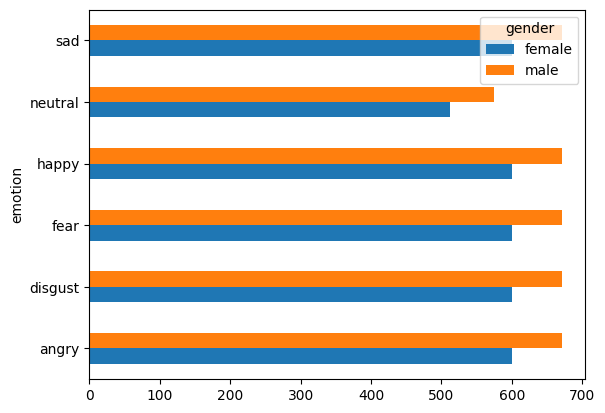

In [ ]:
CREMA_df_summary.plot(kind="barh")

1089_TSI_NEU_XX.wav


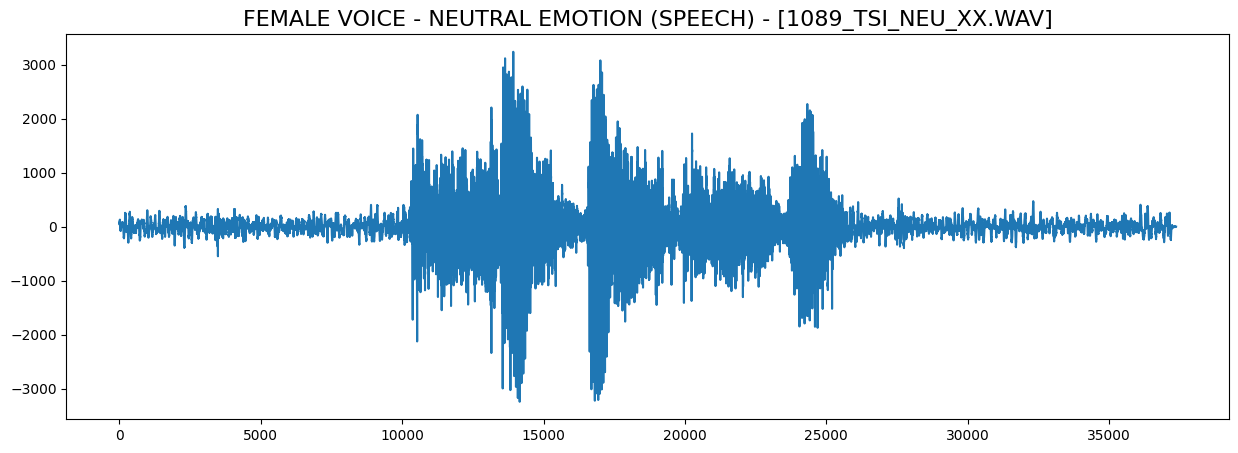

In [ ]:
np.random.seed(SEED)
n_files = len(dir_list)

# choose random number
rnd = np.random.randint(0, n_files)

# use the Librosa library to load and plot the random speech

fname = CREMA_df.path[rnd]
print(fname)
sampling_rate, data = wavfile.read(DATASET_PATH + fname)

plt.figure(figsize=(15, 5))
info = CREMA_df.iloc[rnd].values
title_txt = f"{info[1]} voice - {info[0]} emotion (speech) - [{fname}]"
plt.title(title_txt.upper(), size=16)
plt.plot(data)

# play the audio
ipd.Audio(DATASET_PATH + fname)

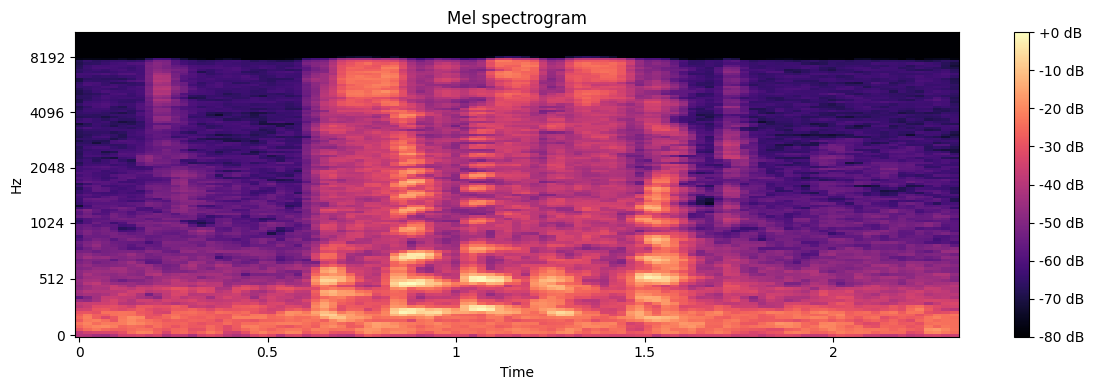

In [ ]:
y, sr = librosa.load(DATASET_PATH + fname)

# Compute mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# Convert to log scale (dB) using the peak power as reference
log_S = librosa.power_to_db(S, ref=np.max)

# Plot mel spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis="time", y_axis="mel")
plt.title("Mel spectrogram")
plt.colorbar(format="%+02.0f dB")
plt.tight_layout()
plt.show()

## Feature extraction

Feature extraction:
Kerkeni, Leila and Serrestou, Youssef and Raoof, Kosai and Cleder, ´
Catherine and Mahjoub, Mohamed and Mbarki, Mohamed, “Automatic
Speech Emotion Recognition Using Machine Learning,” March, 2019.
https://www.intechopen.com/chapters/65993

### Functions

In [ ]:
!pip install git+https://github.com/detly/gammatone.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/detly/gammatone.git to /tmp/pip-req-build-gosv2hml
  Running command git clone --filter=blob:none --quiet https://github.com/detly/gammatone.git /tmp/pip-req-build-gosv2hml
  Resolved https://github.com/detly/gammatone.git to commit 0626328ef7c31d3b33214db2fdcd52e8601eb4c5
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 15.3 MB/s eta 0:00:00
  Created wheel for Gammatone: filename=Gammatone-1.0-py3-none-any.whl size=21759 sha256=a640788561d29f47181f43519a0d44945536fab114ca379073fcc11595536f34
  Stored in directory: /tmp/pip-ephem-wheel-cache-8epmg3ai/wheels/1d/b4/36/1a03814cb85dffddc9345619ba6536cad7c21ae9820107fac6
Successfully built Gammatone


In [ ]:
from gammatone.filters import make_erb_filters, erb_filterbank, erb_space
from scipy.signal import hilbert, butter, sosfiltfilt

In [ ]:
def get_features_paper(filenames, n_mfcc: int = 12, n_mels: int = 19, n_modulation_filters: int = 5):
    np.random.seed(SEED)
    random.seed(SEED)
    all_features = np.zeros((len(filenames), (n_mfcc * 5 + n_mels * n_modulation_filters)))
    for i, filename in enumerate(filenames):
        if i % 100 == 0:
            print(f"{i}/{len(filenames)}")

        y, sr = librosa.load(DATASET_PATH+filename)

        # Extract the MFCC features
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        # Calculate the statistical measures for each MFCC coefficient
        mfcc_mean = np.mean(mfcc, axis=1)
        mfcc_var = np.var(mfcc, axis=1)
        mfcc_std = np.std(mfcc, axis=1)
        mfcc_kurtosis = stats.kurtosis(mfcc, axis=1)
        mfcc_skewness = stats.skew(mfcc, axis=1)
        # Concatenate the MFCC statistical measures into a single feature vector
        mfcc_features = np.hstack([mfcc_mean, mfcc_var, mfcc_std, mfcc_kurtosis, mfcc_skewness])

        # Decompose the speech signal using an auditory filter bank with n_mels filters
        cf = erb_space(20, sr/2, n_mels)
        b = make_erb_filters(sr, cf)
        filtered_signals = erb_filterbank(y, b)

        # Compute the Hilbert envelopes of the critical-band outputs
        hilbert_envelopes = np.abs(hilbert(filtered_signals))

        # Apply a modulation filter bank with n_modulation_filters filters to the Hilbert envelopes
        low_freq = 1
        high_freq = 10
        modulation_spectra = []
        for j in range(n_modulation_filters):
            # Design a bandpass filter for each modulation frequency band
            low = low_freq + j * (high_freq - low_freq) / n_modulation_filters
            high = low_freq + (j + 1) * (high_freq - low_freq) / n_modulation_filters
            sos = butter(4, [low / (sr / 2), high / (sr / 2)], 'band', output='sos')
            # Apply the bandpass filter to each Hilbert envelope
            filtered_envelopes = sosfiltfilt(sos, hilbert_envelopes)
            # Calculate the modulation spectrum by taking the mean of the filtered envelopes along the time axis
            modulation_spectrum = np.mean(filtered_envelopes, axis=1)
            modulation_spectra.append(modulation_spectrum)

        # Concatenate all modulation spectra into a single feature vector
        msf_features = np.hstack(modulation_spectra)


        # Concatenate the MFCC and MSF features into a single feature vector
        feature_vector = np.hstack([mfcc_features, msf_features])
        all_features[i] = feature_vector


    # Define the column names for the MFCC features
    mfcc_column_names = []
    for stat in ["mean", "var", "std", "kurtosis", "skewness"]:
        for i in range(n_mfcc):
            mfcc_column_names.append(f"mfcc{i+1}_{stat}")

    # Define the column names for the MSF features
    msf_column_names = [f'MSF_{i}' for i in range(1, n_mels * n_modulation_filters + 1)]
    column_names = mfcc_column_names + msf_column_names
    # Set the column names of the DataFrame
    all_features = pd.DataFrame(all_features, columns=column_names)

    return all_features

### Run

In [ ]:
EXIT
# if you intended to run this section, run the cells manually

In [ ]:
df_features = get_features_paper(CREMA_df["path"])

0/7442
100/7442
200/7442
300/7442
400/7442
500/7442
600/7442
700/7442
800/7442
900/7442
1000/7442
1100/7442
1200/7442
1300/7442
1400/7442
1500/7442
1600/7442
1700/7442
1800/7442
1900/7442
2000/7442
2100/7442
2200/7442
2300/7442
2400/7442
2500/7442
2600/7442
2700/7442
2800/7442
2900/7442
3000/7442
3100/7442
3200/7442
3300/7442
3400/7442
3500/7442
3600/7442
3700/7442
3800/7442
3900/7442
4000/7442
4100/7442
4200/7442
4300/7442
4400/7442
4500/7442
4600/7442
4700/7442
4800/7442
4900/7442
5000/7442
5100/7442
5200/7442
5300/7442
5400/7442
5500/7442
5600/7442
5700/7442
5800/7442
5900/7442
6000/7442
6100/7442


<ipython-input-28-b7c6e60007e4>:17: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  mfcc_kurtosis = stats.kurtosis(mfcc, axis=1)
<ipython-input-28-b7c6e60007e4>:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  mfcc_skewness = stats.skew(mfcc, axis=1)


6200/7442
6300/7442
6400/7442
6500/7442
6600/7442
6700/7442
6800/7442
6900/7442
7000/7442
7100/7442
7200/7442
7300/7442
7400/7442


In [ ]:
df_features.sample(n=10, random_state=SEED)

mfcc1_mean  mfcc2_mean  mfcc3_mean  mfcc4_mean  mfcc5_mean  mfcc6_mean  \
5617 -279.540771  110.925735   16.557091   42.855915  -16.243370   -2.109955   
1760 -410.895294  152.055984   21.604610   55.551647   -7.049550   14.650393   
4666 -400.901031  139.567886    0.062004   43.420784  -17.291784   28.822931   
4808 -337.103333  101.203590    7.973531   50.904942  -18.084562   25.657633   
1425 -411.538116  144.665695    8.302577   43.918194   -9.989739   24.292200   
5546 -352.517517  102.664917   17.915781   53.079201   -1.544104   20.484060   
5950 -387.530273  132.133545   10.536967   48.821220   -2.432313   16.247452   
3927 -405.688538  143.670792   -1.103822   41.940571  -13.676312   31.097731   
2603 -407.108368  134.942886   16.244915   48.510174   -9.739338   18.786793   
5542 -355.939331  123.562805    4.939578   44.236618    1.424160    9.935249   

      mfcc7_mean  mfcc8_mean  mfcc9_mean  mfcc10_mean  ...        MSF_86  \
5617  -13.779528    0.475067  -17.844702     0.556032  ...  1.649248e-06   
1760  -11.403476   10.909548  -10.677230     0.910698  ... -1.380570e-07   
4666  -15.062913   11.994534   -9.720436     3.427131  ...  2.742774e-07   
4808  -24.867414   11.100263  -17.981445     6.137303  ... -1.058788e-07   
1425   -5.180751   10.276199  -14.766432     2.341882  ...  1.580582e-06   
5546  -15.997551    3.309918  -12.515970     0.218799  ...  1.595720e-06   
5950  -17.305079    6.261427   -7.665352     7.236829  ... -1.229032e-07   
3927  -15.460947    9.692445  -12.386303     5.898898  ... -5.775433e-07   
2603  -11.371811    5.149024  -15.001371     2.502729  ...  4.118741e-08   
5542  -12.908606    9.877155   -8.465483     2.722803  ...  2.512970e-07   

            MSF_87        MSF_88        MSF_89        MSF_90        MSF_91  \
5617  4.322800e-06 -1.271869e-05 -2.935183e-06  4.176761e-06 -5.529735e-06   
1760 -5.638682e-07  1.652884e-07 -1.446300e-06 -1.570819e-06 -6.386781e-07   
4666  1.832690e-07  2.755055e-06  1.092560e-06  3.470260e-07 -1.811856e-08   
4808  7.034090e-07 -5.926501e-07  3.434202e-06 -8.640554e-06 -2.426113e-06   
1425  1.588595e-06  3.477371e-06 -5.737824e-06 -2.892580e-06  5.523717e-07   
5546  2.032079e-07 -8.013079e-07 -2.276660e-06 -4.829084e-06 -7.971977e-06   
5950 -5.654217e-08 -2.635616e-07  1.924010e-07 -1.236539e-06 -1.222617e-07   
3927 -3.735991e-07 -1.182322e-06 -1.384375e-06 -1.160052e-06 -3.825486e-07   
2603  4.064285e-07 -4.699923e-07 -1.260565e-06 -7.775359e-07  2.595841e-06   
5542  6.809296e-07 -2.945532e-06 -2.595303e-06 -5.405794e-07 -3.708197e-07   

            MSF_92        MSF_93        MSF_94        MSF_95  
5617 -4.385958e-06 -8.791561e-07  1.969819e-07 -1.063090e-06  
1760  1.866422e-06 -2.959532e-06  1.167140e-07 -5.879676e-06  
4666  2.065276e-06 -1.141033e-06  7.145034e-07  6.010243e-09  
4808  3.562043e-07 -4.979298e-06 -1.605248e-06 -4.944693e-06  
1425  2.849489e-06  3.157339e-09 -3.198845e-06 -5.718880e-06  
5546 -6.053513e-06 -5.893586e-07  1.631260e-06 -2.453008e-06  
5950 -1.106692e-06 -1.095976e-06  8.547790e-07 -1.546083e-06  
3927 -9.409068e-06 -6.474116e-06 -5.084696e-06 -8.897144e-07  
2603  2.624824e-06 -1.446472e-06 -1.024684e-06 -1.461886e-06  
5542 -3.120742e-06 -1.493260e-06 -8.587545e-07 -1.487430e-06  

[10 rows x 155 columns]

In [ ]:
df_features.to_feather("/content/drive/MyDrive/Kaggle_ds/features/paper_features.feather")

## Loading features

In [ ]:
df_features = pd.read_feather("/content/drive/MyDrive/Kaggle_ds/features/paper_features.feather")

In [ ]:
df_features.sample(n=10, random_state=SEED)

mfcc1_mean  mfcc2_mean  mfcc3_mean  mfcc4_mean  mfcc5_mean  mfcc6_mean  \
5617 -279.540771  110.925735   16.557091   42.855915  -16.243370   -2.109955   
1760 -410.895294  152.055984   21.604610   55.551647   -7.049550   14.650393   
4666 -400.901031  139.567886    0.062004   43.420784  -17.291784   28.822931   
4808 -337.103333  101.203590    7.973531   50.904942  -18.084562   25.657633   
1425 -411.538116  144.665695    8.302577   43.918194   -9.989739   24.292200   
5546 -352.517517  102.664917   17.915781   53.079201   -1.544104   20.484060   
5950 -387.530273  132.133545   10.536967   48.821220   -2.432313   16.247452   
3927 -405.688538  143.670792   -1.103822   41.940571  -13.676312   31.097731   
2603 -407.108368  134.942886   16.244915   48.510174   -9.739338   18.786793   
5542 -355.939331  123.562805    4.939578   44.236618    1.424160    9.935249   

      mfcc7_mean  mfcc8_mean  mfcc9_mean  mfcc10_mean  ...        MSF_86  \
5617  -13.779528    0.475067  -17.844702     0.556032  ...  1.649248e-06   
1760  -11.403476   10.909548  -10.677230     0.910698  ... -1.380570e-07   
4666  -15.062913   11.994534   -9.720436     3.427131  ...  2.742774e-07   
4808  -24.867414   11.100263  -17.981445     6.137303  ... -1.058788e-07   
1425   -5.180751   10.276199  -14.766432     2.341882  ...  1.580582e-06   
5546  -15.997551    3.309918  -12.515970     0.218799  ...  1.595720e-06   
5950  -17.305079    6.261427   -7.665352     7.236829  ... -1.229032e-07   
3927  -15.460947    9.692445  -12.386303     5.898898  ... -5.775433e-07   
2603  -11.371811    5.149024  -15.001371     2.502729  ...  4.118741e-08   
5542  -12.908606    9.877155   -8.465483     2.722803  ...  2.512970e-07   

            MSF_87        MSF_88        MSF_89        MSF_90        MSF_91  \
5617  4.322800e-06 -1.271869e-05 -2.935183e-06  4.176761e-06 -5.529735e-06   
1760 -5.638682e-07  1.652884e-07 -1.446300e-06 -1.570819e-06 -6.386781e-07   
4666  1.832690e-07  2.755055e-06  1.092560e-06  3.470260e-07 -1.811856e-08   
4808  7.034090e-07 -5.926501e-07  3.434202e-06 -8.640554e-06 -2.426113e-06   
1425  1.588595e-06  3.477371e-06 -5.737824e-06 -2.892580e-06  5.523717e-07   
5546  2.032079e-07 -8.013079e-07 -2.276660e-06 -4.829084e-06 -7.971977e-06   
5950 -5.654217e-08 -2.635616e-07  1.924010e-07 -1.236539e-06 -1.222617e-07   
3927 -3.735991e-07 -1.182322e-06 -1.384375e-06 -1.160052e-06 -3.825486e-07   
2603  4.064285e-07 -4.699923e-07 -1.260565e-06 -7.775359e-07  2.595841e-06   
5542  6.809296e-07 -2.945532e-06 -2.595303e-06 -5.405794e-07 -3.708197e-07   

            MSF_92        MSF_93        MSF_94        MSF_95  
5617 -4.385958e-06 -8.791561e-07  1.969819e-07 -1.063090e-06  
1760  1.866422e-06 -2.959532e-06  1.167140e-07 -5.879676e-06  
4666  2.065276e-06 -1.141033e-06  7.145034e-07  6.010243e-09  
4808  3.562043e-07 -4.979298e-06 -1.605248e-06 -4.944693e-06  
1425  2.849489e-06  3.157339e-09 -3.198845e-06 -5.718880e-06  
5546 -6.053513e-06 -5.893586e-07  1.631260e-06 -2.453008e-06  
5950 -1.106692e-06 -1.095976e-06  8.547790e-07 -1.546083e-06  
3927 -9.409068e-06 -6.474116e-06 -5.084696e-06 -8.897144e-07  
2603  2.624824e-06 -1.446472e-06 -1.024684e-06 -1.461886e-06  
5542 -3.120742e-06 -1.493260e-06 -8.587545e-07 -1.487430e-06  

[10 rows x 155 columns]

In [ ]:
index = df_features['mfcc1_mean'].idxmin()

In [ ]:
print(index)

6187


In [ ]:
df_features.iloc[6187]

mfcc1_mean   -1131.370728
mfcc2_mean       0.000000
mfcc3_mean       0.000000
mfcc4_mean       0.000000
mfcc5_mean       0.000000
                 ...     
MSF_91           0.000000
MSF_92           0.000000
MSF_93           0.000000
MSF_94           0.000000
MSF_95           0.000000
Name: 6187, Length: 155, dtype: float64

In [ ]:
dir_list[6187]

'1076_MTI_SAD_XX.wav'

## Data splitting

In [ ]:
lb = LabelEncoder()
CREMA_df["emotion"] = lb.fit_transform(CREMA_df["emotion"])
for i in range(len(lb.classes_)):
    print(f'Label {lb.classes_[i]} mapped to {i}')

Label angry mapped to 0
Label disgust mapped to 1
Label fear mapped to 2
Label happy mapped to 3
Label neutral mapped to 4
Label sad mapped to 5


In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(df_features, CREMA_df["emotion"], test_size=0.3, random_state=SEED, stratify=CREMA_df["emotion"], shuffle=True)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=SEED, stratify=y_train_val, shuffle=True)
print(len(X_train))
print(len(X_val))
print(len(X_test))

4688
521
2233


### One-Hot encoding labels

In [ ]:
y_train_oe = np_utils.to_categorical(y_train)
y_val_oe = np_utils.to_categorical(y_val)
y_test_oe = np_utils.to_categorical(y_test)

## Speaker Normalization

In [ ]:
# Calculate the mean and standard deviation of each feature column using only the training data
mean = X_train.mean()
std = X_train.std()

# Normalize the features in the training, validation and testing sets
X_train_normalized = (X_train - mean) / std
X_val_normalized = (X_val - mean) / std
X_test_normalized = (X_test - mean) / std

### Removing nan/inf

In [ ]:
# assuming your data is stored in a NumPy array called X_train
print("Number of nan values in X_train:", np.isnan(X_train_normalized).sum().sum())
print("Number of inf values in X_train:", np.isinf(X_train_normalized).sum().sum())

Number of nan values in X_train: 24
Number of inf values in X_train: 0


The one row that had an error during feature extraction

In [ ]:
# assuming your data is stored in a NumPy array called X_train
print("Number of nan values in X_val:", np.isnan(X_val_normalized).sum().sum())
print("Number of inf values in X_val:", np.isinf(X_val_normalized).sum().sum())

Number of nan values in X_val: 0
Number of inf values in X_val: 0


In [ ]:
# assuming your data is stored in a NumPy array called X_train
print("Number of nan values in X_test:", np.isnan(X_test_normalized).sum().sum())
print("Number of inf values in X_test:", np.isinf(X_test_normalized).sum().sum())

Number of nan values in X_test: 0
Number of inf values in X_test: 0


In [ ]:
# assuming X_train and y_train_oe are both NumPy arrays
# find the indices of the rows containing nan values
nan_rows = np.isnan(X_train_normalized).any(axis=1)

# drop the rows containing nan values from both X_train and y_train_oe
X_train_normalized = X_train_normalized[~nan_rows]
y_train_oe = y_train_oe[~nan_rows]

In [ ]:
# assuming your data is stored in a NumPy array called X_train
print("Number of nan values in X_train:", np.isnan(X_train_normalized).sum().sum())
print("Number of inf values in X_train:", np.isinf(X_train_normalized).sum().sum())

Number of nan values in X_train: 0
Number of inf values in X_train: 0


## Model callbacks

In [ ]:
def get_f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1

## Normal

### Model

In [ ]:
def create_model():
    model=Sequential()
    model.add(Conv1D(32, kernel_size=21, strides=1, padding='same', activation='relu',
                     input_shape=(X_train_normalized.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(64, kernel_size=19, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(128, kernel_size=17, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(256, kernel_size=15, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(512, kernel_size=13, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=11, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=9, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dense(6, activation='softmax'))
    opt=tensorflow.keras.optimizers.Adam(
      learning_rate=0.001,
      beta_1=0.9,
      beta_2=0.999,
  )
    model.compile(loss = 'categorical_crossentropy',optimizer=opt,metrics = ['accuracy',get_f1])
    return model


### Training

In [ ]:
# train model
model = create_model()
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/paper_1d.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

tensorflow.convert_to_tensor(X_train_normalized, dtype=tensorflow.float32)
cnn_results=model.fit(X_train_normalized, y_train_oe,
                      batch_size=32,
                      epochs=1000,
                      validation_data = (X_val_normalized,y_val_oe),
                      callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/1000
147/147 [==============================] - ETA: 0s - loss: 1.7809 - accuracy: 0.3247 - get_f1: 0.2055
Epoch 1: val_accuracy improved from -inf to 0.24568, saving model to /content/drive/MyDrive/Kaggle_ds/paper_1d.best.hdf5
147/147 [==============================] - 18s 56ms/step - loss: 1.7809 - accuracy: 0.3247 - get_f1: 0.2055 - val_loss: 1.7543 - val_accuracy: 0.2457 - val_get_f1: 0.0036 - lr: 0.0010
Epoch 2/1000
147/147 [==============================] - ETA: 0s - loss: 1.4745 - accuracy: 0.3983 - get_f1: 0.2367
Epoch 2: val_accuracy improved from 0.24568 to 0.30326, saving model to /content/drive/MyDrive/Kaggle_ds/paper_1d.best.hdf5
147/147 [==============================] - 5s 35ms/step - loss: 1.4745 - accuracy: 0.3983 - get_f1: 0.2367 - val_loss: 1.7914 - val_accuracy: 0.3033 - val_get_f1: 0.1059 - lr: 0.0010
Epoch 3/1000
147/147 [==============================] - ETA: 0s - loss: 1.4008 - accuracy: 0.4227 - get_f1: 0.2675
Epoch 3: val_accuracy improved from 0.30326

### Results

<Figure size 640x480 with 0 Axes>

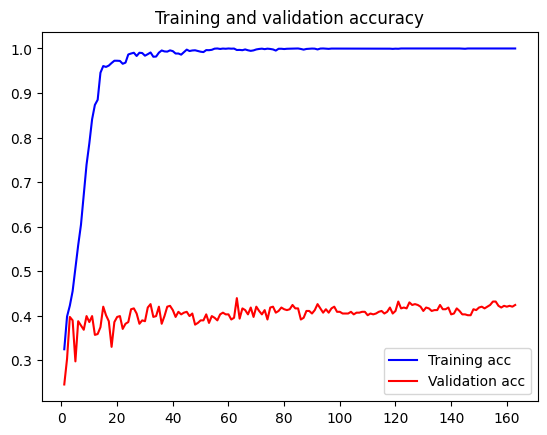

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

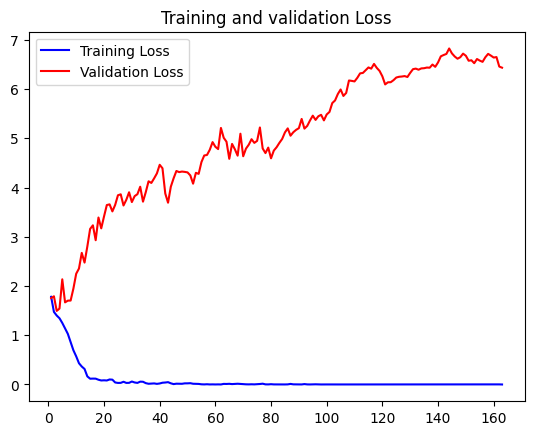

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

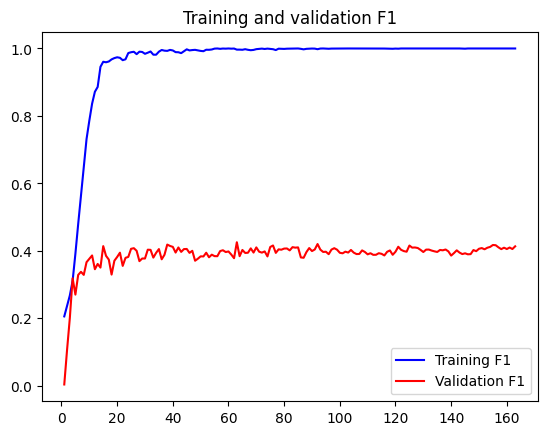

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs=range(1,len(save_metric.f1)+1)
plt.plot(epochs,save_metric.f1,'b',label='Training F1')
plt.plot(epochs,save_metric.val_f1,'r',label='Validation F1')
plt.title('Training and validation F1')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/paper_1d.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(X_test_normalized, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_oe, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       382
           1       0.35      0.41      0.38       381
           2       0.37      0.28      0.32       381
           3       0.42      0.38      0.40       382
           4       0.41      0.36      0.38       326
           5       0.51      0.59      0.54       381

    accuracy                           0.46      2233
   macro avg       0.45      0.45      0.45      2233
weighted avg       0.45      0.46      0.45      2233



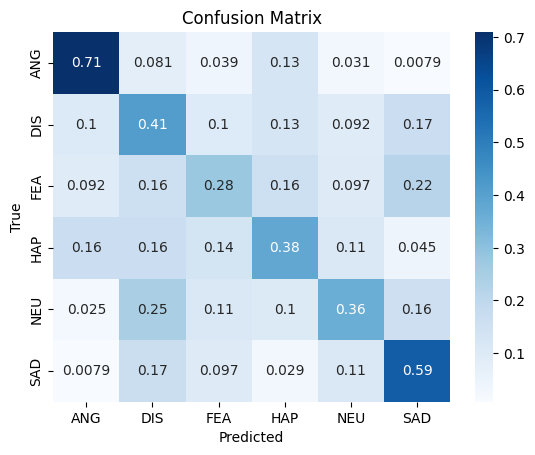

In [ ]:
# Label ANG mapped to 0
# Label DIS mapped to 1
# Label FEA mapped to 2
# Label HAP mapped to 3
# Label NEU mapped to 4
# Label SAD mapped to 5

# confusion matrix for test data

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Dropouts

### Model

In [ ]:
def create_model_dropout():
    model=Sequential()
    model.add(Conv1D(32, kernel_size=21, strides=1, padding='same', activation='relu', input_shape=(X_train_normalized.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, kernel_size=19, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(128, kernel_size=17, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.2))

    model.add(Conv1D(256, kernel_size=15, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(512, kernel_size=13, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.2))

    model.add(Conv1D(1024, kernel_size=11, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=9, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))

    model.add(Dense(6, activation='softmax'))
    opt=tensorflow.keras.optimizers.Adam(
      learning_rate=0.001,
      beta_1=0.9,
      beta_2=0.999,
    )
    model.compile(loss = 'categorical_crossentropy',optimizer=opt,metrics = ['accuracy',get_f1])
    return model


### Training

In [ ]:
# train model
model = create_model_dropout()
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/paper_1d_large_dropout.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

tensorflow.convert_to_tensor(X_train_normalized, dtype=tensorflow.float32)
cnn_results=model.fit(X_train_normalized, y_train_oe,
                      batch_size=32,
                      epochs=1000,
                      validation_data = (X_val_normalized,y_val_oe),
                      callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/1000
147/147 [==============================] - ETA: 0s - loss: 1.7987 - accuracy: 0.3202 - get_f1: 0.1726
Epoch 1: val_accuracy improved from -inf to 0.23800, saving model to /content/drive/MyDrive/Kaggle_ds/paper_1d_large_dropout.best.hdf5
147/147 [==============================] - 12s 37ms/step - loss: 1.7987 - accuracy: 0.3202 - get_f1: 0.1726 - val_loss: 1.7980 - val_accuracy: 0.2380 - val_get_f1: 0.0036 - lr: 0.0010
Epoch 2/1000
147/147 [==============================] - ETA: 0s - loss: 1.5331 - accuracy: 0.3674 - get_f1: 0.1850
Epoch 2: val_accuracy improved from 0.23800 to 0.25528, saving model to /content/drive/MyDrive/Kaggle_ds/paper_1d_large_dropout.best.hdf5
147/147 [==============================] - 5s 34ms/step - loss: 1.5331 - accuracy: 0.3674 - get_f1: 0.1850 - val_loss: 1.6471 - val_accuracy: 0.2553 - val_get_f1: 0.0176 - lr: 0.0010
Epoch 3/1000
145/147 [============================>.] - ETA: 0s - loss: 1.4969 - accuracy: 0.3864 - get_f1: 0.2059
Epoch 3: val_ac

### Results

<Figure size 640x480 with 0 Axes>

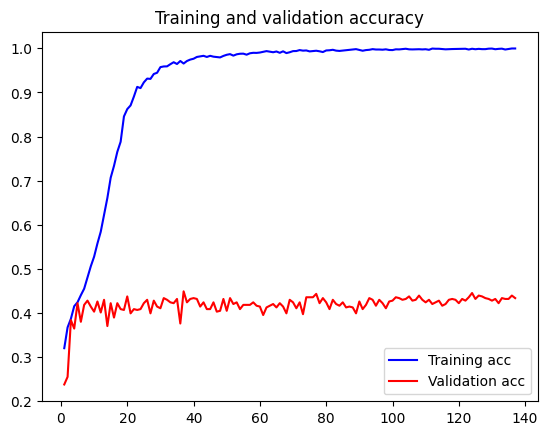

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

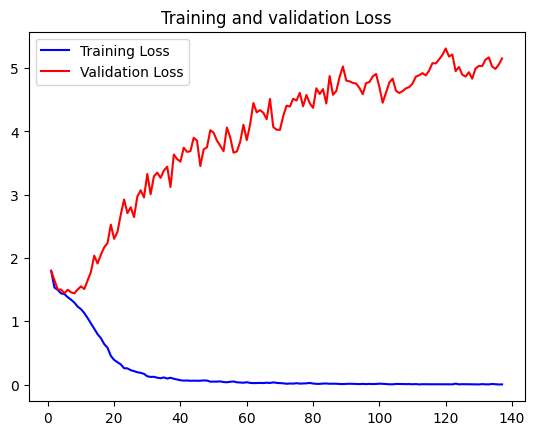

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

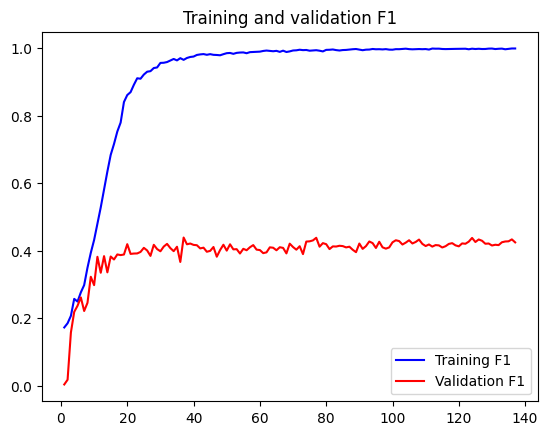

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs=range(1,len(save_metric.f1)+1)
plt.plot(epochs,save_metric.f1,'b',label='Training F1')
plt.plot(epochs,save_metric.val_f1,'r',label='Validation F1')
plt.title('Training and validation F1')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/paper_1d_large_dropout.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(X_test_normalized, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_oe, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.61      0.69      0.65       382
           1       0.37      0.35      0.36       381
           2       0.42      0.27      0.33       381
           3       0.38      0.35      0.36       382
           4       0.37      0.47      0.42       326
           5       0.50      0.56      0.53       381

    accuracy                           0.45      2233
   macro avg       0.44      0.45      0.44      2233
weighted avg       0.44      0.45      0.44      2233



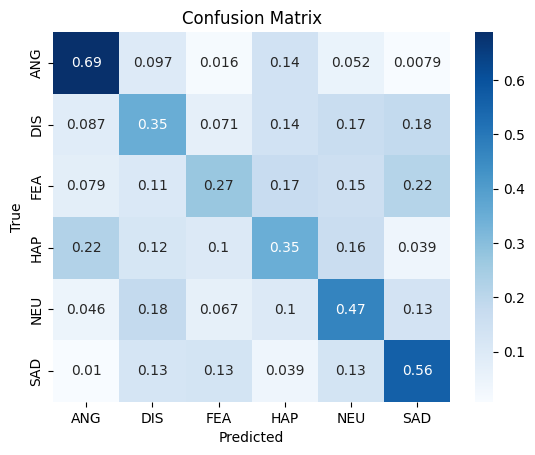

In [ ]:
# Label ANG mapped to 0
# Label DIS mapped to 1
# Label FEA mapped to 2
# Label HAP mapped to 3
# Label NEU mapped to 4
# Label SAD mapped to 5

# confusion matrix for test data

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Dropouts (more)

### Model

In [ ]:
def create_model_dropout2():
    model=Sequential()
    model.add(Conv1D(32, kernel_size=21, strides=1, padding='same', activation='relu', input_shape=(X_train_normalized.shape[1], 1)))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(64, kernel_size=19, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(128, kernel_size=17, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(256, kernel_size=15, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(512, kernel_size=13, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=11, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=9, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(6, activation='softmax'))
    opt=tensorflow.keras.optimizers.Adam(
      learning_rate=0.001,
      beta_1=0.9,
      beta_2=0.999,
    )
    model.compile(loss = 'categorical_crossentropy',optimizer=opt,metrics = ['accuracy',get_f1])
    return model


### Training

In [ ]:
# train model
model = create_model_dropout2()
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=15, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/paper_1d_large_dropout2.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

tensorflow.convert_to_tensor(X_train_normalized, dtype=tensorflow.float32)
cnn_results=model.fit(X_train_normalized, y_train_oe,
                      batch_size=32,
                      epochs=1000,
                      validation_data = (X_val_normalized,y_val_oe),
                      callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/1000
147/147 [==============================] - ETA: 0s - loss: 2.4359 - accuracy: 0.2296 - get_f1: 0.1265
Epoch 1: val_accuracy improved from -inf to 0.18234, saving model to /content/drive/MyDrive/Kaggle_ds/paper_1d_large_dropout2.best.hdf5
147/147 [==============================] - 18s 70ms/step - loss: 2.4359 - accuracy: 0.2296 - get_f1: 0.1265 - val_loss: 1.7931 - val_accuracy: 0.1823 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 2/1000
147/147 [==============================] - ETA: 0s - loss: 1.7268 - accuracy: 0.2735 - get_f1: 0.0912
Epoch 2: val_accuracy did not improve from 0.18234
147/147 [==============================] - 4s 28ms/step - loss: 1.7268 - accuracy: 0.2735 - get_f1: 0.0912 - val_loss: 1.7882 - val_accuracy: 0.1747 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 3/1000
147/147 [==============================] - ETA: 0s - loss: 1.6532 - accuracy: 0.2964 - get_f1: 0.1102
Epoch 3: val_accuracy did not improve from 0.18234
147/147 [==============================] -

### Results

<Figure size 640x480 with 0 Axes>

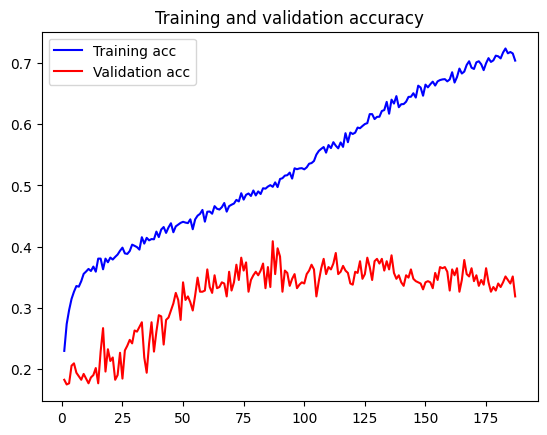

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

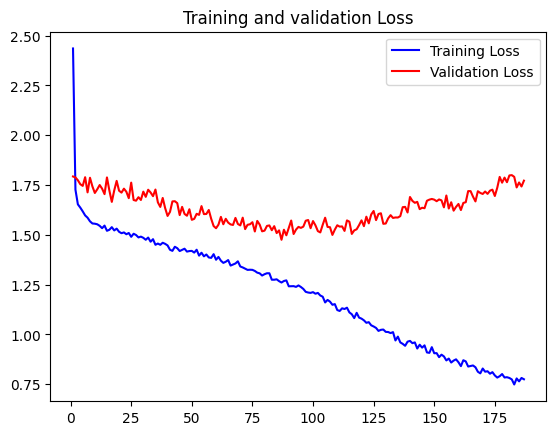

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

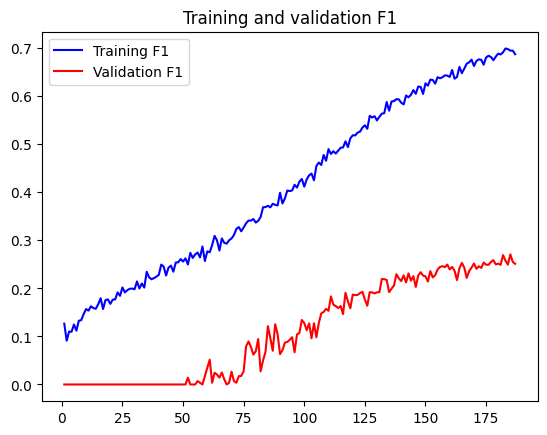

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs=range(1,len(save_metric.f1)+1)
plt.plot(epochs,save_metric.f1,'b',label='Training F1')
plt.plot(epochs,save_metric.val_f1,'r',label='Validation F1')
plt.title('Training and validation F1')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/paper_1d_large_dropout2.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(X_test_normalized, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_oe, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.67      0.62      0.64       382
           1       0.37      0.36      0.36       381
           2       0.33      0.00      0.01       381
           3       0.38      0.53      0.44       382
           4       0.29      0.65      0.40       326
           5       0.56      0.36      0.44       381

    accuracy                           0.42      2233
   macro avg       0.43      0.42      0.38      2233
weighted avg       0.44      0.42      0.38      2233



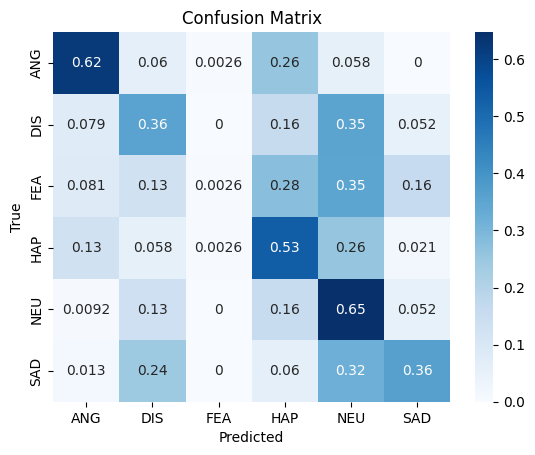

In [ ]:
# Label ANG mapped to 0
# Label DIS mapped to 1
# Label FEA mapped to 2
# Label HAP mapped to 3
# Label NEU mapped to 4
# Label SAD mapped to 5

# confusion matrix for test data

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## LDA (n=5)

In [ ]:
lda = LDA(n_components=5)
lda.fit(X_train_normalized, np.argmax(y_train_oe, axis=1))

LinearDiscriminantAnalysis(n_components=5)

In [ ]:
X_train_normalized_lda = lda.transform(X_train_normalized)
X_val_normalized_lda = lda.transform(X_val_normalized)
X_test_normalized_lda = lda.transform(X_test_normalized)

### Model

In [ ]:
def create_model_lda():
    model=Sequential()
    model.add(Conv1D(32, kernel_size=21, strides=1, padding='same', activation='relu', input_shape=(X_train_normalized_lda.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(64, kernel_size=19, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(128, kernel_size=17, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(256, kernel_size=15, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(512, kernel_size=13, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=11, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=9, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dense(6, activation='softmax'))
    opt=tensorflow.keras.optimizers.Adam(
      learning_rate=0.001,
      beta_1=0.9,
      beta_2=0.999,
  )
    model.compile(loss = 'categorical_crossentropy',optimizer=opt,metrics = ['accuracy',get_f1])
    return model


### Training

In [ ]:
# train model
model = create_model_lda()
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=80)
filepath="/content/drive/MyDrive/Kaggle_ds/paper_1d_lda.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

tensorflow.convert_to_tensor(X_train_normalized_lda, dtype=tensorflow.float32)
cnn_results=model.fit(X_train_normalized_lda, y_train_oe,
                      batch_size=32,
                      epochs=1000,
                      validation_data = (X_val_normalized_lda,y_val_oe),
                      callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/1000
147/147 [==============================] - ETA: 0s - loss: 1.6430 - accuracy: 0.4568 - get_f1: 0.3988
Epoch 1: val_accuracy improved from -inf to 0.17083, saving model to /content/drive/MyDrive/Kaggle_ds/paper_1d_lda.best.hdf5
147/147 [==============================] - 17s 44ms/step - loss: 1.6430 - accuracy: 0.4568 - get_f1: 0.3988 - val_loss: 1.8372 - val_accuracy: 0.1708 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 2/1000
145/147 [============================>.] - ETA: 0s - loss: 1.4494 - accuracy: 0.4841 - get_f1: 0.3942
Epoch 2: val_accuracy improved from 0.17083 to 0.28791, saving model to /content/drive/MyDrive/Kaggle_ds/paper_1d_lda.best.hdf5
147/147 [==============================] - 4s 29ms/step - loss: 1.4506 - accuracy: 0.4843 - get_f1: 0.3938 - val_loss: 1.6434 - val_accuracy: 0.2879 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 3/1000
147/147 [==============================] - ETA: 0s - loss: 1.3864 - accuracy: 0.4986 - get_f1: 0.4230
Epoch 3: val_accuracy impro

### Results

<Figure size 640x480 with 0 Axes>

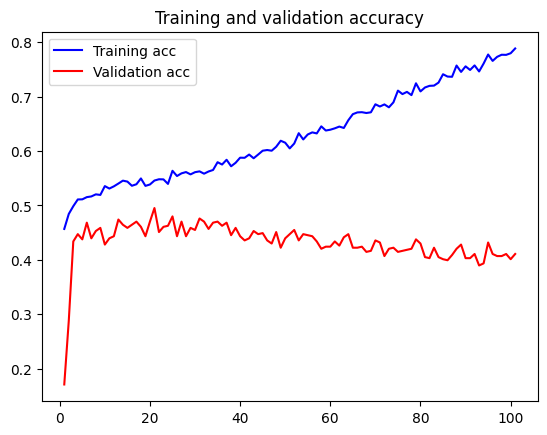

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

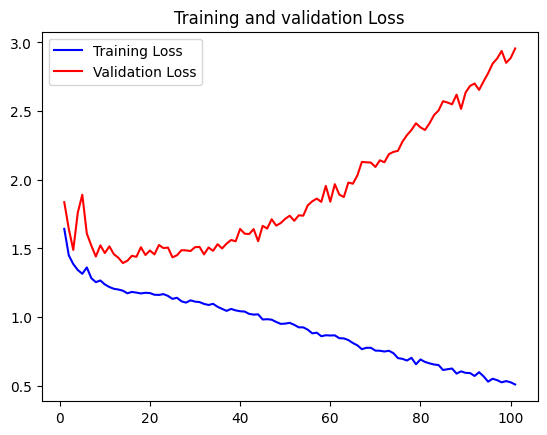

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

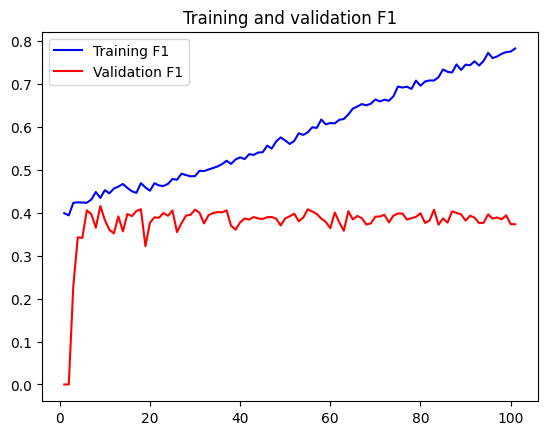

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs=range(1,len(save_metric.f1)+1)
plt.plot(epochs,save_metric.f1,'b',label='Training F1')
plt.plot(epochs,save_metric.val_f1,'r',label='Validation F1')
plt.title('Training and validation F1')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/paper_1d_lda.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(X_test_normalized_lda, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_oe, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       382
           1       0.42      0.33      0.37       381
           2       0.44      0.31      0.36       381
           3       0.40      0.41      0.41       382
           4       0.39      0.61      0.48       326
           5       0.58      0.64      0.61       381

    accuracy                           0.48      2233
   macro avg       0.49      0.49      0.48      2233
weighted avg       0.49      0.48      0.48      2233



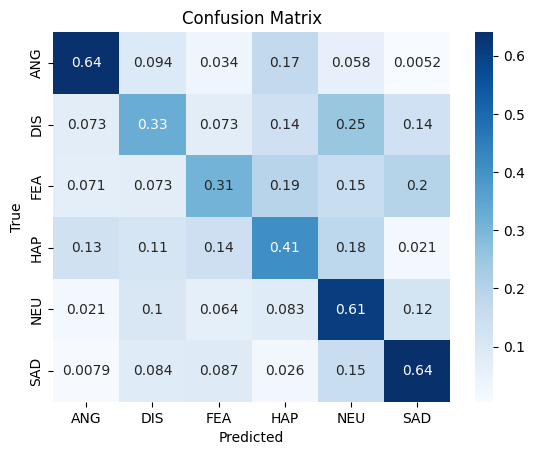

In [ ]:
# Label ANG mapped to 0
# Label DIS mapped to 1
# Label FEA mapped to 2
# Label HAP mapped to 3
# Label NEU mapped to 4
# Label SAD mapped to 5

# confusion matrix for test data

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## LDA (n=3)

In [ ]:
lda = LDA(n_components=3)
lda.fit(X_train_normalized, np.argmax(y_train_oe, axis=1))

LinearDiscriminantAnalysis(n_components=3)

In [ ]:
X_train_normalized_lda = lda.transform(X_train_normalized)
X_val_normalized_lda = lda.transform(X_val_normalized)
X_test_normalized_lda = lda.transform(X_test_normalized)

### Model

In [ ]:
def create_model_lda():
    model=Sequential()
    model.add(Conv1D(32, kernel_size=21, strides=1, padding='same', activation='relu', input_shape=(X_train_normalized_lda.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(64, kernel_size=19, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(128, kernel_size=17, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(256, kernel_size=15, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(512, kernel_size=13, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=11, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=9, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dense(6, activation='softmax'))
    opt=tensorflow.keras.optimizers.Adam(
      learning_rate=0.001,
      beta_1=0.9,
      beta_2=0.999,
  )
    model.compile(loss = 'categorical_crossentropy',optimizer=opt,metrics = ['accuracy',get_f1])
    return model


### Training

In [ ]:
# train model
model = create_model_lda()
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=80)
filepath="/content/drive/MyDrive/Kaggle_ds/paper_1d_lda_3.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

tensorflow.convert_to_tensor(X_train_normalized_lda, dtype=tensorflow.float32)
cnn_results=model.fit(X_train_normalized_lda, y_train_oe,
                      batch_size=32,
                      epochs=1000,
                      validation_data = (X_val_normalized_lda,y_val_oe),
                      callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/1000
145/147 [============================>.] - ETA: 0s - loss: 1.7397 - accuracy: 0.4099 - get_f1: 0.3488
Epoch 1: val_accuracy improved from -inf to 0.17083, saving model to /content/drive/MyDrive/Kaggle_ds/paper_1d_lda_3.best.hdf5
147/147 [==============================] - 11s 33ms/step - loss: 1.7350 - accuracy: 0.4099 - get_f1: 0.3486 - val_loss: 1.8728 - val_accuracy: 0.1708 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 2/1000
145/147 [============================>.] - ETA: 0s - loss: 1.4827 - accuracy: 0.4435 - get_f1: 0.3542
Epoch 2: val_accuracy improved from 0.17083 to 0.22073, saving model to /content/drive/MyDrive/Kaggle_ds/paper_1d_lda_3.best.hdf5
147/147 [==============================] - 4s 29ms/step - loss: 1.4819 - accuracy: 0.4438 - get_f1: 0.3544 - val_loss: 1.7044 - val_accuracy: 0.2207 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 3/1000
145/147 [============================>.] - ETA: 0s - loss: 1.4655 - accuracy: 0.4528 - get_f1: 0.3643
Epoch 3: val_accuracy i

### Results

<Figure size 640x480 with 0 Axes>

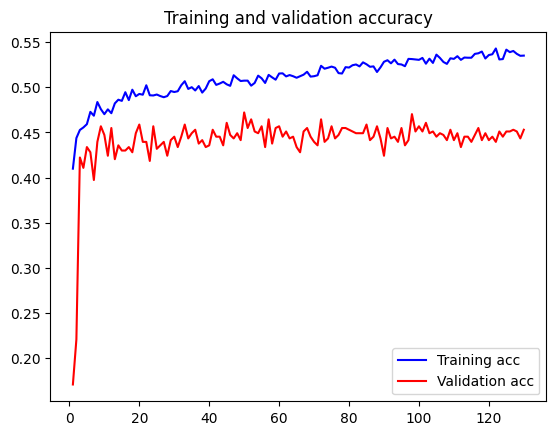

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

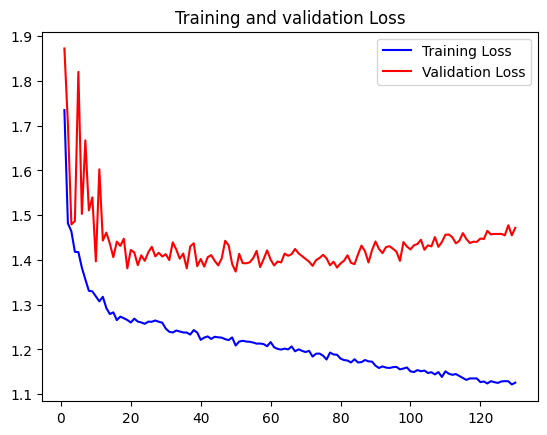

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

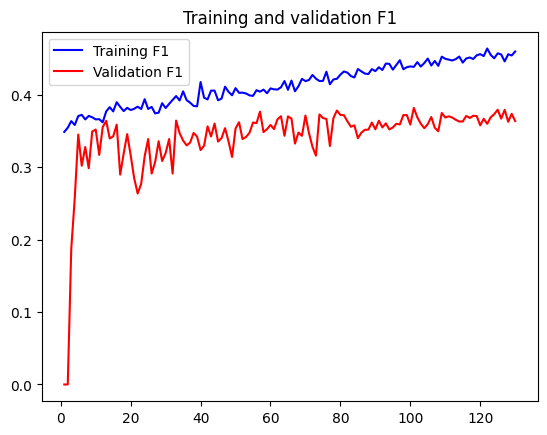

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs=range(1,len(save_metric.f1)+1)
plt.plot(epochs,save_metric.f1,'b',label='Training F1')
plt.plot(epochs,save_metric.val_f1,'r',label='Validation F1')
plt.title('Training and validation F1')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/paper_1d_lda_3.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(X_test_normalized_lda, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_oe, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       382
           1       0.32      0.26      0.29       381
           2       0.44      0.35      0.39       381
           3       0.42      0.40      0.41       382
           4       0.39      0.40      0.39       326
           5       0.56      0.67      0.61       381

    accuracy                           0.47      2233
   macro avg       0.45      0.47      0.46      2233
weighted avg       0.46      0.47      0.46      2233



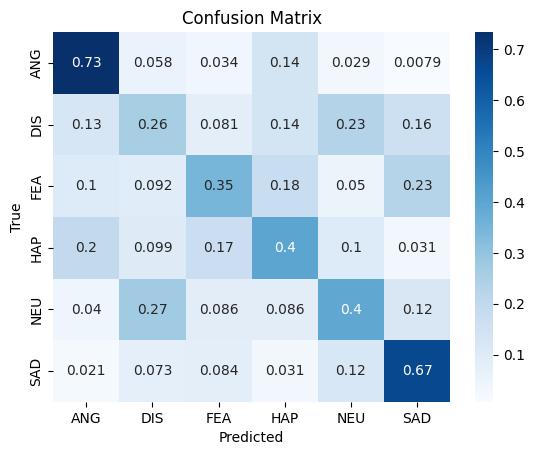

In [ ]:
# Label ANG mapped to 0
# Label DIS mapped to 1
# Label FEA mapped to 2
# Label HAP mapped to 3
# Label NEU mapped to 4
# Label SAD mapped to 5

# confusion matrix for test data

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Mutual Information (n=10)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute the mutual information
mi = mutual_info_classif(X_train_normalized, np.argmax(y_train_oe, axis=1))

# Get the indices of the features sorted by their mutual information values in descending order
sorted_indices = np.argsort(mi)[::-1]

# Select the top 10 features
X_train_normalized_mi = X_train_normalized.iloc[:, sorted_indices[:10]]
X_val_normalized_mi = X_val_normalized.iloc[:, sorted_indices[:10]]
X_test_normalized_mi = X_test_normalized.iloc[:, sorted_indices[:10]]

# Print the mutual information for the top 10 features
print(f"Mutual information for top 10 features: {mi[sorted_indices[:10]]}")

Mutual information for top 10 features: [0.32004522 0.30103763 0.30100073 0.29507567 0.29505772 0.20337239
 0.20337178 0.19564621 0.19262364 0.18060013]


### Model

In [ ]:
def create_model_mi():
    model=Sequential()
    model.add(Conv1D(32, kernel_size=21, strides=1, padding='same', activation='relu', input_shape=(X_train_normalized_mi.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(64, kernel_size=19, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(128, kernel_size=17, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(256, kernel_size=15, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(512, kernel_size=13, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=11, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=9, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dense(6, activation='softmax'))
    opt=tensorflow.keras.optimizers.Adam(
      learning_rate=0.001,
      beta_1=0.9,
      beta_2=0.999,
  )
    model.compile(loss = 'categorical_crossentropy',optimizer=opt,metrics = ['accuracy',get_f1])
    return model


### Training

In [ ]:
# train model
model = create_model_mi()
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=80)
filepath="/content/drive/MyDrive/Kaggle_ds/paper_1d_mi.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

tensorflow.convert_to_tensor(X_train_normalized_mi, dtype=tensorflow.float32)
cnn_results=model.fit(X_train_normalized_mi, y_train_oe,
                      batch_size=32,
                      epochs=1000,
                      validation_data = (X_val_normalized_mi,y_val_oe),
                      callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/1000
147/147 [==============================] - ETA: 0s - loss: 1.8937 - accuracy: 0.3220 - get_f1: 0.2405
Epoch 1: val_accuracy improved from -inf to 0.17274, saving model to /content/drive/MyDrive/Kaggle_ds/paper_1d_mi.best.hdf5
147/147 [==============================] - 27s 63ms/step - loss: 1.8937 - accuracy: 0.3220 - get_f1: 0.2405 - val_loss: 1.8152 - val_accuracy: 0.1727 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 2/1000
146/147 [============================>.] - ETA: 0s - loss: 1.6644 - accuracy: 0.3455 - get_f1: 0.2267
Epoch 2: val_accuracy improved from 0.17274 to 0.24952, saving model to /content/drive/MyDrive/Kaggle_ds/paper_1d_mi.best.hdf5
147/147 [==============================] - 4s 29ms/step - loss: 1.6648 - accuracy: 0.3454 - get_f1: 0.2259 - val_loss: 1.7107 - val_accuracy: 0.2495 - val_get_f1: 0.0036 - lr: 0.0010
Epoch 3/1000
147/147 [==============================] - ETA: 0s - loss: 1.6867 - accuracy: 0.3461 - get_f1: 0.1985
Epoch 3: val_accuracy improved fr

### Results

<Figure size 640x480 with 0 Axes>

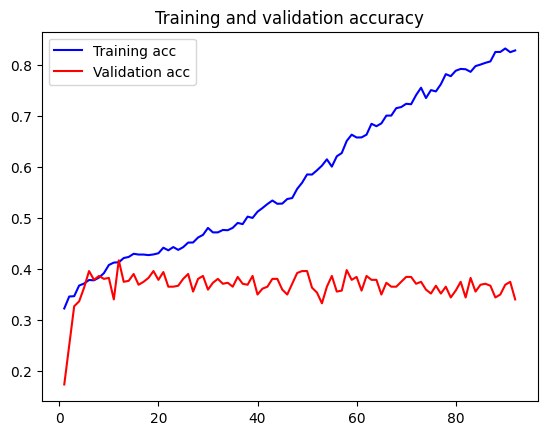

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

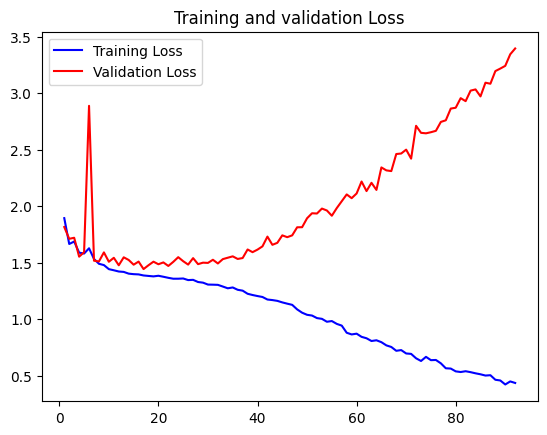

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

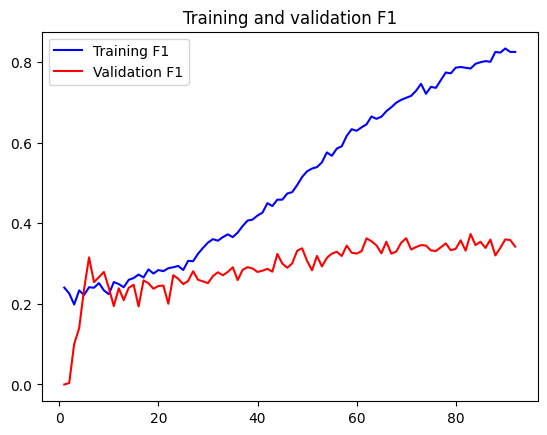

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs=range(1,len(save_metric.f1)+1)
plt.plot(epochs,save_metric.f1,'b',label='Training F1')
plt.plot(epochs,save_metric.val_f1,'r',label='Validation F1')
plt.title('Training and validation F1')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/paper_1d_mi.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(X_test_normalized_mi, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_oe, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.58      0.68      0.63       382
           1       0.29      0.15      0.20       381
           2       0.32      0.05      0.08       381
           3       0.32      0.41      0.36       382
           4       0.32      0.60      0.42       326
           5       0.55      0.62      0.58       381

    accuracy                           0.41      2233
   macro avg       0.40      0.42      0.38      2233
weighted avg       0.40      0.41      0.38      2233



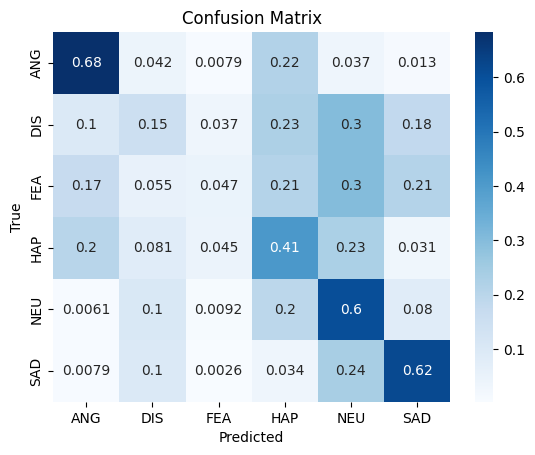

In [ ]:
# Label ANG mapped to 0
# Label DIS mapped to 1
# Label FEA mapped to 2
# Label HAP mapped to 3
# Label NEU mapped to 4
# Label SAD mapped to 5

# confusion matrix for test data

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Mutual Information (n=3)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute the mutual information
mi = mutual_info_classif(X_train_normalized, np.argmax(y_train_oe, axis=1))

# Get the indices of the features sorted by their mutual information values in descending order
sorted_indices = np.argsort(mi)[::-1]

# Select the top 3 features
X_train_normalized_mi = X_train_normalized.iloc[:, sorted_indices[:3]]
X_val_normalized_mi = X_val_normalized.iloc[:, sorted_indices[:3]]
X_test_normalized_mi = X_test_normalized.iloc[:, sorted_indices[:3]]

# Print the mutual information for the top 3 features
print(f"Mutual information for top 3 features: {mi[sorted_indices[:3]]}")

Mutual information for top 3 features: [0.32004522 0.30103763 0.30100073]


### Model

In [ ]:
def create_model_mi():
    model=Sequential()
    model.add(Conv1D(32, kernel_size=21, strides=1, padding='same', activation='relu', input_shape=(X_train_normalized_mi.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(64, kernel_size=19, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(128, kernel_size=17, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(256, kernel_size=15, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(512, kernel_size=13, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=11, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=9, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dense(6, activation='softmax'))
    opt=tensorflow.keras.optimizers.Adam(
      learning_rate=0.001,
      beta_1=0.9,
      beta_2=0.999,
  )
    model.compile(loss = 'categorical_crossentropy',optimizer=opt,metrics = ['accuracy',get_f1])
    return model


### Training

In [ ]:
# train model
model = create_model_mi()
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=80)
filepath="/content/drive/MyDrive/Kaggle_ds/paper_1d_mi_3.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

tensorflow.convert_to_tensor(X_train_normalized_mi, dtype=tensorflow.float32)
cnn_results=model.fit(X_train_normalized_mi, y_train_oe,
                      batch_size=32,
                      epochs=1000,
                      validation_data = (X_val_normalized_mi,y_val_oe),
                      callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/1000
147/147 [==============================] - ETA: 0s - loss: 1.8373 - accuracy: 0.3126 - get_f1: 0.2231
Epoch 1: val_accuracy improved from -inf to 0.17083, saving model to /content/drive/MyDrive/Kaggle_ds/paper_1d_mi_3.best.hdf5
147/147 [==============================] - 14s 33ms/step - loss: 1.8373 - accuracy: 0.3126 - get_f1: 0.2231 - val_loss: 1.8576 - val_accuracy: 0.1708 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 2/1000
145/147 [============================>.] - ETA: 0s - loss: 1.7236 - accuracy: 0.3351 - get_f1: 0.1963
Epoch 2: val_accuracy improved from 0.17083 to 0.26679, saving model to /content/drive/MyDrive/Kaggle_ds/paper_1d_mi_3.best.hdf5
147/147 [==============================] - 4s 29ms/step - loss: 1.7219 - accuracy: 0.3352 - get_f1: 0.1957 - val_loss: 1.7865 - val_accuracy: 0.2668 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 3/1000
147/147 [==============================] - ETA: 0s - loss: 1.6050 - accuracy: 0.3533 - get_f1: 0.2058
Epoch 3: val_accuracy imp

### Results

<Figure size 640x480 with 0 Axes>

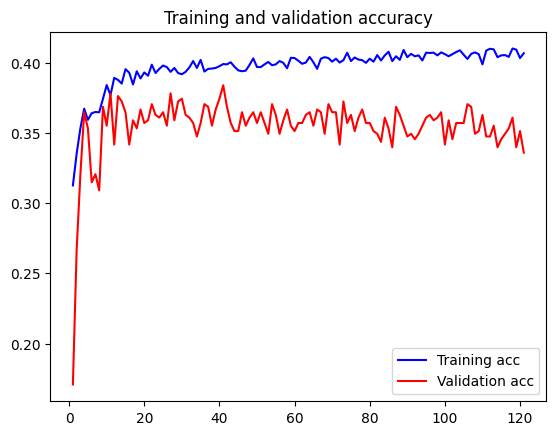

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

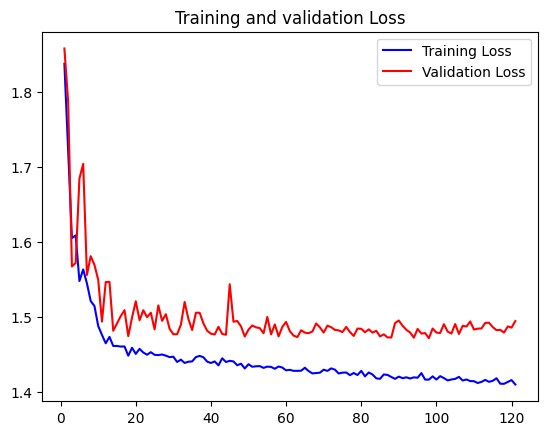

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

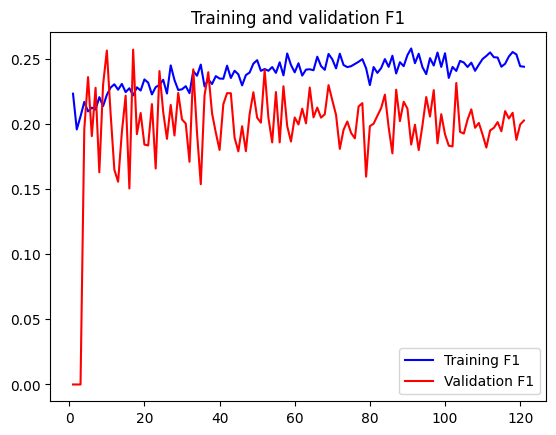

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs=range(1,len(save_metric.f1)+1)
plt.plot(epochs,save_metric.f1,'b',label='Training F1')
plt.plot(epochs,save_metric.val_f1,'r',label='Validation F1')
plt.title('Training and validation F1')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/paper_1d_mi_3.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(X_test_normalized_mi, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_oe, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.66      0.55      0.60       382
           1       0.25      0.00      0.01       381
           2       0.27      0.03      0.06       381
           3       0.30      0.58      0.39       382
           4       0.32      0.52      0.40       326
           5       0.48      0.75      0.58       381

    accuracy                           0.40      2233
   macro avg       0.38      0.41      0.34      2233
weighted avg       0.38      0.40      0.34      2233



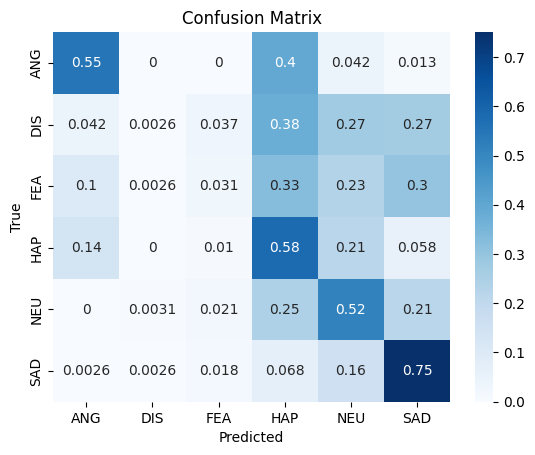

In [ ]:
# Label ANG mapped to 0
# Label DIS mapped to 1
# Label FEA mapped to 2
# Label HAP mapped to 3
# Label NEU mapped to 4
# Label SAD mapped to 5

# confusion matrix for test data

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# CREMA (different MSF extraction)

## Imports and downloading dataset

In [ ]:
import os
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import numpy as np
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.layers import Dense
import tensorflow
import tensorflow.keras
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, LeakyReLU
from keras.utils import np_utils
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

import keras
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization,MaxPooling1D,GlobalMaxPooling1D
import seaborn as sns
import random
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
from keras import backend as K
K._get_available_gpus()

['/device:GPU:0']

In [ ]:
from google.colab import drive

drive.mount("/content/drive")
DATASET_PATH = "/content/drive/MyDrive/Kaggle_ds/Crema/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content/drive/MyDrive/Kaggle_ds"

In [ ]:
if not os.path.exists("/content/drive/MyDrive/Kaggle_ds/"):
    os.makedirs("/content/drive/MyDrive/Kaggle_ds/")

In [ ]:
if len(os.listdir(os.environ["KAGGLE_CONFIG_DIR"])) == 1:
    !kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en -p /content/drive/MyDrive/Kaggle_ds --unzip

In [ ]:
%ls DATASET_PATH

ls: cannot access 'DATASET_PATH': No such file or directory


In [ ]:
# Get all filenames into a list
dir_list: list[str] = os.listdir(DATASET_PATH)
dir_list.sort()
dir_list[:5]

['1001_DFA_ANG_XX.wav',
 '1001_DFA_DIS_XX.wav',
 '1001_DFA_FEA_XX.wav',
 '1001_DFA_HAP_XX.wav',
 '1001_DFA_NEU_XX.wav']

In [ ]:
emotion_mapping: dict[str, str] = {
    "SAD": "sad",
    "ANG": "angry",
    "DIS": "disgust",
    "FEA": "fear",
    "HAP": "happy",
    "NEU": "neutral",
}
female_ids: list[int] = [
    1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,
    1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,1052,1053,1054,
    1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,
    1082,1084,1089,1091,
]


def get_labels_crema(
    file_list, mapping, female_ids
) -> tuple[list[str], list[str], list[str]]:
    emotion: list[str] = []
    gender: list[str] = []
    path: list[str] = []

    for filename in file_list:
        path.append(filename)
        filename = filename.split("_")
        emotion.append(mapping[filename[2]])
        gender.append("female" if int(filename[0]) in female_ids else "male")
    return emotion, gender, path


emotion, gender, path = get_labels_crema(
    dir_list, mapping=emotion_mapping, female_ids=female_ids
)

In [ ]:
CREMA_df = pd.DataFrame(emotion, columns=["emotion"])
CREMA_df = pd.concat([CREMA_df, pd.DataFrame(gender, columns=["gender"])], axis=1)
CREMA_df = pd.concat([CREMA_df, pd.DataFrame(path, columns=["path"])], axis=1)
CREMA_df["source"] = "CREMA"

In [ ]:
CREMA_df.head()

emotion gender                 path source
0    angry   male  1001_DFA_ANG_XX.wav  CREMA
1  disgust   male  1001_DFA_DIS_XX.wav  CREMA
2     fear   male  1001_DFA_FEA_XX.wav  CREMA
3    happy   male  1001_DFA_HAP_XX.wav  CREMA
4  neutral   male  1001_DFA_NEU_XX.wav  CREMA

In [ ]:
CREMA_df_summary = CREMA_df.pivot_table(
    index="emotion", columns="gender", aggfunc=len, values="source"
)
CREMA_df_summary

gender   female  male
emotion              
angry       600   671
disgust     600   671
fear        600   671
happy       600   671
neutral     512   575
sad         600   671

<Axes: ylabel='emotion'>

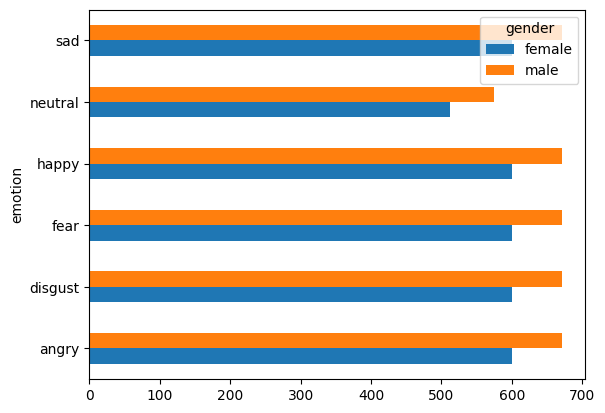

In [ ]:
CREMA_df_summary.plot(kind="barh")

1089_TSI_NEU_XX.wav


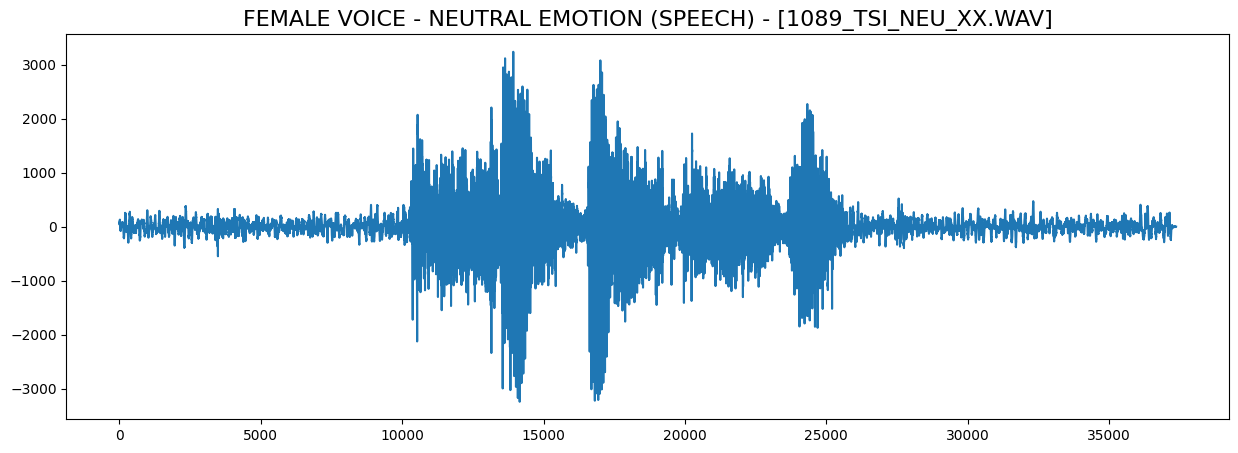

In [ ]:
np.random.seed(SEED)
n_files = len(dir_list)

# choose random number
rnd = np.random.randint(0, n_files)

# use the Librosa library to load and plot the random speech

fname = CREMA_df.path[rnd]
print(fname)
sampling_rate, data = wavfile.read(DATASET_PATH + fname)

plt.figure(figsize=(15, 5))
info = CREMA_df.iloc[rnd].values
title_txt = f"{info[1]} voice - {info[0]} emotion (speech) - [{fname}]"
plt.title(title_txt.upper(), size=16)
plt.plot(data)

# play the audio
ipd.Audio(DATASET_PATH + fname)

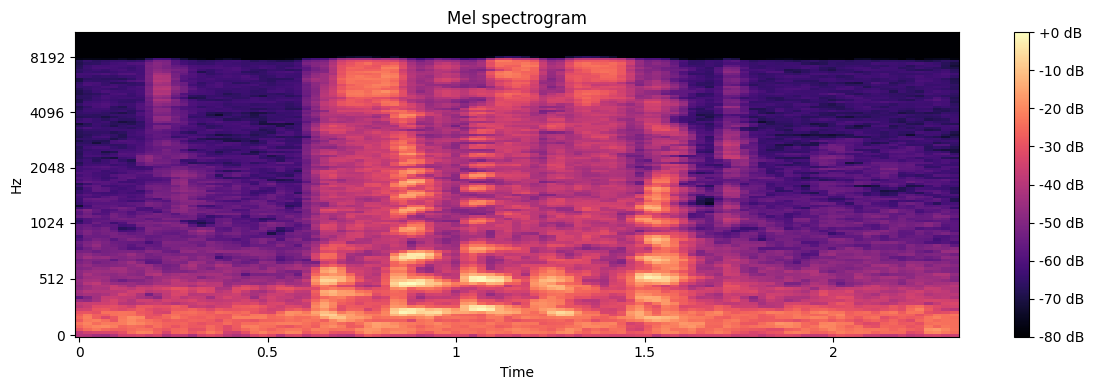

In [ ]:
y, sr = librosa.load(DATASET_PATH + fname)

# Compute mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# Convert to log scale (dB) using the peak power as reference
log_S = librosa.power_to_db(S, ref=np.max)

# Plot mel spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis="time", y_axis="mel")
plt.title("Mel spectrogram")
plt.colorbar(format="%+02.0f dB")
plt.tight_layout()
plt.show()

## Feature extraction

Feature extraction:
Kerkeni, Leila and Serrestou, Youssef and Raoof, Kosai and Cleder, ´
Catherine and Mahjoub, Mohamed and Mbarki, Mohamed, “Automatic
Speech Emotion Recognition Using Machine Learning,” March, 2019.
https://www.intechopen.com/chapters/65993

### Functions

In [ ]:
from scipy.signal import hilbert

In [ ]:
def get_features_paper(filenames, n_mfcc: int = 12, n_mels: int = 19, n_modulation_filters: int = 5):
    np.random.seed(SEED)
    random.seed(SEED)
    all_features = np.zeros((len(filenames), (n_mfcc * 5 + n_mels * n_modulation_filters)))
    for i, filename in enumerate(filenames):
        if i % 100 == 0:
            print(f"{i}/{len(filenames)}")

        y, sr = librosa.load(DATASET_PATH+filename)
        desired_length = 8 * sr
        if len(y) < desired_length:
            y = np.pad(y, (0, desired_length - len(y)), mode='constant')

        # Extract the MFCC features
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        # Calculate the statistical measures for each MFCC coefficient
        mfcc_mean = np.mean(mfcc, axis=1)
        mfcc_var = np.var(mfcc, axis=1)
        mfcc_std = np.std(mfcc, axis=1)
        mfcc_kurtosis = stats.kurtosis(mfcc, axis=1)
        mfcc_skewness = stats.skew(mfcc, axis=1)
        # Concatenate the MFCC statistical measures into a single feature vector
        mfcc_features = np.hstack([mfcc_mean, mfcc_var, mfcc_std, mfcc_kurtosis, mfcc_skewness])

        # Compute the spectrogram of the input signal
        spectrogram = np.abs(librosa.stft(y))

        # Decompose the speech signal using an auditory filterbank
        auditory_filterbank = librosa.filters.mel(sr=sr, n_fft=2048, n_mels=n_mels)
        decomposed_signal = np.dot(auditory_filterbank, spectrogram)

        # Compute the Hilbert envelopes of the critical-band outputs
        hilbert_envelopes = np.abs(librosa.core.stft(decomposed_signal))

        # Apply a modulation filterbank to each frame of the Hilbert envelopes
        modulation_filterbank = librosa.filters.mel(sr=sr, n_fft=2048, n_mels=n_modulation_filters)
        modulation_spectra = np.dot(modulation_filterbank, hilbert_envelopes.T).T

        # Measure the energy of the decomposed envelope signals
        energy = np.sum(modulation_spectra**2, axis=1)

        # Calculate MSFs from the ST representation
        msf_features = energy.reshape(n_mels*n_modulation_filters)

        # Concatenate the MFCC and MSF features into a single feature vector
        feature_vector = np.hstack([mfcc_features, msf_features])
        all_features[i] = feature_vector


    # Define the column names for the MFCC features
    mfcc_column_names = []
    for stat in ["mean", "var", "std", "kurtosis", "skewness"]:
        for i in range(n_mfcc):
            mfcc_column_names.append(f"mfcc{i+1}_{stat}")

    # Define the column names for the MSF features
    msf_column_names = [f'MSF_{i}' for i in range(1, n_mels * n_modulation_filters + 1)]
    column_names = mfcc_column_names + msf_column_names
    # Set the column names of the DataFrame
    all_features = pd.DataFrame(all_features, columns=column_names)

    return all_features

### Run

In [ ]:
EXIT
# if you intended to run this section, run the cells manually

In [ ]:
df_features = get_features_paper(CREMA_df["path"])

0/7442


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=345
  warnings.warn(


100/7442
200/7442
300/7442
400/7442
500/7442
600/7442
700/7442
800/7442
900/7442
1000/7442
1100/7442
1200/7442
1300/7442
1400/7442
1500/7442
1600/7442
1700/7442
1800/7442
1900/7442
2000/7442
2100/7442
2200/7442
2300/7442
2400/7442
2500/7442
2600/7442
2700/7442
2800/7442
2900/7442
3000/7442
3100/7442
3200/7442
3300/7442
3400/7442
3500/7442
3600/7442
3700/7442
3800/7442
3900/7442
4000/7442
4100/7442
4200/7442
4300/7442
4400/7442
4500/7442
4600/7442
4700/7442
4800/7442
4900/7442
5000/7442
5100/7442
5200/7442
5300/7442
5400/7442
5500/7442
5600/7442
5700/7442
5800/7442
5900/7442
6000/7442
6100/7442


<ipython-input-17-a7a029dd5464>:20: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  mfcc_kurtosis = stats.kurtosis(mfcc, axis=1)
<ipython-input-17-a7a029dd5464>:21: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  mfcc_skewness = stats.skew(mfcc, axis=1)


6200/7442
6300/7442
6400/7442
6500/7442
6600/7442
6700/7442
6800/7442
6900/7442
7000/7442
7100/7442
7200/7442
7300/7442
7400/7442


In [ ]:
df_features.sample(n=10, random_state=SEED)

mfcc1_mean  mfcc2_mean  mfcc3_mean  mfcc4_mean  mfcc5_mean  mfcc6_mean  \
5617 -450.457336   29.364088    4.459496   11.377080   -4.233384   -0.526777   
1760 -607.441772   54.970924    7.914094   20.042461   -2.500028    5.288993   
4666 -629.183838   44.770336    0.134579   13.923772   -5.456289    9.217254   
4808 -545.762024   29.215462    2.416534   14.686752   -5.147158    7.385751   
1425 -643.581238   36.719963    2.248948   11.170163   -2.470952    6.137516   
5546 -513.315063   33.745552    5.975573   17.476707   -0.432157    6.765568   
5950 -557.679871   53.282818    4.441209   19.677612   -0.909611    6.570130   
3927 -646.950378   41.552406   -0.244172   12.105497   -3.873665    8.934687   
2603 -584.684082   51.055824    6.263721   18.370823   -3.607033    7.115072   
5542 -508.600555   50.830807    2.235025   18.229937    0.690192    4.147655   

      mfcc7_mean  mfcc8_mean  mfcc9_mean  mfcc10_mean  ...        MSF_86  \
5617   -3.622864    0.123887   -4.716215     0.133994  ...  2.180919e-04   
1760   -4.087207    3.929536   -3.855284     0.309510  ...  3.692495e-07   
4666   -4.773326    3.854118   -3.094705     1.082173  ...  3.915275e-06   
4808   -7.119668    3.196842   -5.152372     1.767569  ...  1.371988e-03   
1425   -1.318287    2.558239   -3.765516     0.566248  ...  2.800226e-07   
5546   -5.199574    1.109490   -4.087346     0.072965  ...  1.927277e-04   
5950   -6.878152    2.549664   -3.034353     2.907321  ...  1.628788e-05   
3927   -4.480027    2.767130   -3.574001     1.691356  ...  7.244302e-07   
2603   -4.281865    1.923556   -5.660219     0.954900  ...  5.398005e-06   
5542   -5.221349    4.063158   -3.436601     1.127616  ...  3.578465e-05   

            MSF_87        MSF_88        MSF_89        MSF_90        MSF_91  \
5617  2.174253e-04  1.141762e-04  2.018942e-05  2.204827e-06  2.543789e-10   
1760  1.271533e-07  3.889378e-08  1.467836e-08  3.849173e-09  1.404615e-10   
4666  8.325199e-07  1.269350e-06  4.136160e-07  5.314527e-08  5.454796e-10   
4808  5.725614e-04  1.668017e-04  3.035518e-05  2.554869e-06  8.352149e-13   
1425  7.506016e-08  5.020899e-08  1.567721e-08  1.887091e-09  3.099780e-10   
5546  9.002210e-05  4.295712e-05  5.281464e-06  4.767475e-07  1.062248e-09   
5950  5.606647e-06  3.446461e-06  4.121354e-07  3.797997e-08  2.316352e-11   
3927  4.669833e-07  1.932385e-07  9.872333e-08  1.368025e-08  1.063682e-12   
2603  2.851884e-06  1.175965e-06  1.970926e-07  1.195681e-08  1.104874e-10   
5542  1.555913e-05  8.511426e-06  2.324031e-06  2.549605e-07  3.284145e-10   

            MSF_92        MSF_93        MSF_94        MSF_95  
5617  2.518949e-10  2.358871e-10  1.921478e-10  9.883820e-11  
1760  1.376274e-10  1.289857e-10  1.051851e-10  5.409956e-11  
4666  5.336865e-10  5.004262e-10  4.080160e-10  2.098562e-10  
4808  3.009699e-13  8.192204e-14  1.790029e-14  3.428839e-15  
1425  3.036926e-10  2.846237e-10  2.321025e-10  1.193602e-10  
5546  1.039414e-09  9.753670e-10  7.950661e-10  4.088987e-10  
5950  2.270104e-11  2.125463e-11  1.734934e-11  8.942180e-12  
3927  1.014996e-12  8.760755e-13  5.530584e-13  1.143329e-13  
2603  1.080649e-10  1.013295e-10  8.264119e-11  4.250270e-11  
5542  3.215417e-10  3.016730e-10  2.458730e-10  1.264826e-10  

[10 rows x 155 columns]

In [ ]:
df_features.to_feather("/content/drive/MyDrive/Kaggle_ds/features_crema2/paper_features.feather")

## Loading features

In [ ]:
df_features = pd.read_feather("/content/drive/MyDrive/Kaggle_ds/features_crema2/paper_features.feather")

In [ ]:
df_features.sample(n=10, random_state=SEED)

mfcc1_mean  mfcc2_mean  mfcc3_mean  mfcc4_mean  mfcc5_mean  mfcc6_mean  \
5617 -450.457336   29.364088    4.459496   11.377080   -4.233384   -0.526777   
1760 -607.441772   54.970924    7.914094   20.042461   -2.500028    5.288993   
4666 -629.183838   44.770336    0.134579   13.923772   -5.456289    9.217254   
4808 -545.762024   29.215462    2.416534   14.686752   -5.147158    7.385751   
1425 -643.581238   36.719963    2.248948   11.170163   -2.470952    6.137516   
5546 -513.315063   33.745552    5.975573   17.476707   -0.432157    6.765568   
5950 -557.679871   53.282818    4.441209   19.677612   -0.909611    6.570130   
3927 -646.950378   41.552406   -0.244172   12.105497   -3.873665    8.934687   
2603 -584.684082   51.055824    6.263721   18.370823   -3.607033    7.115072   
5542 -508.600555   50.830807    2.235025   18.229937    0.690192    4.147655   

      mfcc7_mean  mfcc8_mean  mfcc9_mean  mfcc10_mean  ...        MSF_86  \
5617   -3.622864    0.123887   -4.716215     0.133994  ...  2.180919e-04   
1760   -4.087207    3.929536   -3.855284     0.309510  ...  3.692495e-07   
4666   -4.773326    3.854118   -3.094705     1.082173  ...  3.915275e-06   
4808   -7.119668    3.196842   -5.152372     1.767569  ...  1.371988e-03   
1425   -1.318287    2.558239   -3.765516     0.566248  ...  2.800226e-07   
5546   -5.199574    1.109490   -4.087346     0.072965  ...  1.927277e-04   
5950   -6.878152    2.549664   -3.034353     2.907321  ...  1.628788e-05   
3927   -4.480027    2.767130   -3.574001     1.691356  ...  7.244302e-07   
2603   -4.281865    1.923556   -5.660219     0.954900  ...  5.398005e-06   
5542   -5.221349    4.063158   -3.436601     1.127616  ...  3.578465e-05   

            MSF_87        MSF_88        MSF_89        MSF_90        MSF_91  \
5617  2.174253e-04  1.141762e-04  2.018942e-05  2.204827e-06  2.543789e-10   
1760  1.271533e-07  3.889378e-08  1.467836e-08  3.849173e-09  1.404615e-10   
4666  8.325199e-07  1.269350e-06  4.136160e-07  5.314527e-08  5.454796e-10   
4808  5.725614e-04  1.668017e-04  3.035518e-05  2.554869e-06  8.352149e-13   
1425  7.506016e-08  5.020899e-08  1.567721e-08  1.887091e-09  3.099780e-10   
5546  9.002210e-05  4.295712e-05  5.281464e-06  4.767475e-07  1.062248e-09   
5950  5.606647e-06  3.446461e-06  4.121354e-07  3.797997e-08  2.316352e-11   
3927  4.669833e-07  1.932385e-07  9.872333e-08  1.368025e-08  1.063682e-12   
2603  2.851884e-06  1.175965e-06  1.970926e-07  1.195681e-08  1.104874e-10   
5542  1.555913e-05  8.511426e-06  2.324031e-06  2.549605e-07  3.284145e-10   

            MSF_92        MSF_93        MSF_94        MSF_95  
5617  2.518949e-10  2.358871e-10  1.921478e-10  9.883820e-11  
1760  1.376274e-10  1.289857e-10  1.051851e-10  5.409956e-11  
4666  5.336865e-10  5.004262e-10  4.080160e-10  2.098562e-10  
4808  3.009699e-13  8.192204e-14  1.790029e-14  3.428839e-15  
1425  3.036926e-10  2.846237e-10  2.321025e-10  1.193602e-10  
5546  1.039414e-09  9.753670e-10  7.950661e-10  4.088987e-10  
5950  2.270104e-11  2.125463e-11  1.734934e-11  8.942180e-12  
3927  1.014996e-12  8.760755e-13  5.530584e-13  1.143329e-13  
2603  1.080649e-10  1.013295e-10  8.264119e-11  4.250270e-11  
5542  3.215417e-10  3.016730e-10  2.458730e-10  1.264826e-10  

[10 rows x 155 columns]

## Data splitting

In [ ]:
lb = LabelEncoder()
CREMA_df["emotion"] = lb.fit_transform(CREMA_df["emotion"])
for i in range(len(lb.classes_)):
    print(f'Label {lb.classes_[i]} mapped to {i}')

Label angry mapped to 0
Label disgust mapped to 1
Label fear mapped to 2
Label happy mapped to 3
Label neutral mapped to 4
Label sad mapped to 5


In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(df_features, CREMA_df["emotion"], test_size=0.3, random_state=SEED, stratify=CREMA_df["emotion"], shuffle=True)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=SEED, stratify=y_train_val, shuffle=True)
print(len(X_train))
print(len(X_val))
print(len(X_test))

4688
521
2233


### One-Hot encoding labels

In [ ]:
y_train_oe = np_utils.to_categorical(y_train)
y_val_oe = np_utils.to_categorical(y_val)
y_test_oe = np_utils.to_categorical(y_test)

## Speaker Normalization

In [ ]:
# Calculate the mean and standard deviation of each feature column using only the training data
mean = X_train.mean()
std = X_train.std()

# Normalize the features in the training, validation and testing sets
X_train_normalized = (X_train - mean) / std
X_val_normalized = (X_val - mean) / std
X_test_normalized = (X_test - mean) / std

### Removing nan/inf

In [ ]:
# assuming your data is stored in a NumPy array called X_train
print("Number of nan values in X_train:", np.isnan(X_train_normalized).sum().sum())
print("Number of inf values in X_train:", np.isinf(X_train_normalized).sum().sum())

Number of nan values in X_train: 24
Number of inf values in X_train: 0


The one row that had an error during feature extraction

In [ ]:
# assuming your data is stored in a NumPy array called X_train
print("Number of nan values in X_val:", np.isnan(X_val_normalized).sum().sum())
print("Number of inf values in X_val:", np.isinf(X_val_normalized).sum().sum())

Number of nan values in X_val: 0
Number of inf values in X_val: 0


In [ ]:
# assuming your data is stored in a NumPy array called X_train
print("Number of nan values in X_test:", np.isnan(X_test_normalized).sum().sum())
print("Number of inf values in X_test:", np.isinf(X_test_normalized).sum().sum())

Number of nan values in X_test: 0
Number of inf values in X_test: 0


In [ ]:
# assuming X_train and y_train_oe are both NumPy arrays
# find the indices of the rows containing nan values
nan_rows = np.isnan(X_train_normalized).any(axis=1)

# drop the rows containing nan values from both X_train and y_train_oe
X_train_normalized = X_train_normalized[~nan_rows]
y_train_oe = y_train_oe[~nan_rows]

In [ ]:
# assuming your data is stored in a NumPy array called X_train
print("Number of nan values in X_train:", np.isnan(X_train_normalized).sum().sum())
print("Number of inf values in X_train:", np.isinf(X_train_normalized).sum().sum())

Number of nan values in X_train: 0
Number of inf values in X_train: 0


## Model callbacks

In [ ]:
def get_f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1

## Normal

### Model

In [ ]:
def create_model():
    model=Sequential()
    model.add(Conv1D(32, kernel_size=21, strides=1, padding='same', activation='relu', input_shape=(X_train_normalized.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(64, kernel_size=19, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(128, kernel_size=17, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(256, kernel_size=15, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(512, kernel_size=13, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=11, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=9, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dense(6, activation='softmax'))
    opt=tensorflow.keras.optimizers.Adam(
      learning_rate=0.001,
      beta_1=0.9,
      beta_2=0.999,
  )
    model.compile(loss = 'categorical_crossentropy',optimizer=opt,metrics = ['accuracy',get_f1])
    return model


### Training

In [ ]:
# train model
model = create_model()
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=15, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/crema_models2/paper_1d.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

tensorflow.convert_to_tensor(X_train_normalized, dtype=tensorflow.float32)
cnn_results=model.fit(X_train_normalized, y_train_oe,
                      batch_size=16,
                      epochs=1000,
                      validation_data = (X_val_normalized,y_val_oe),
                      callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/1000
293/293 [==============================] - ETA: 0s - loss: 1.7440 - accuracy: 0.3527 - get_f1: 0.2096
Epoch 1: val_accuracy improved from -inf to 0.35317, saving model to /content/drive/MyDrive/Kaggle_ds/crema_models2/paper_1d.best.hdf5
293/293 [==============================] - 31s 36ms/step - loss: 1.7440 - accuracy: 0.3527 - get_f1: 0.2096 - val_loss: 1.5943 - val_accuracy: 0.3532 - val_get_f1: 0.1876 - lr: 0.0010
Epoch 2/1000
292/293 [============================>.] - ETA: 0s - loss: 1.4509 - accuracy: 0.4223 - get_f1: 0.2406
Epoch 2: val_accuracy improved from 0.35317 to 0.36660, saving model to /content/drive/MyDrive/Kaggle_ds/crema_models2/paper_1d.best.hdf5
293/293 [==============================] - 9s 29ms/step - loss: 1.4514 - accuracy: 0.4218 - get_f1: 0.2402 - val_loss: 1.5661 - val_accuracy: 0.3666 - val_get_f1: 0.2206 - lr: 0.0010
Epoch 3/1000
293/293 [==============================] - ETA: 0s - loss: 1.3873 - accuracy: 0.4361 - get_f1: 0.2813
Epoch 3: val_ac

### Results

<Figure size 640x480 with 0 Axes>

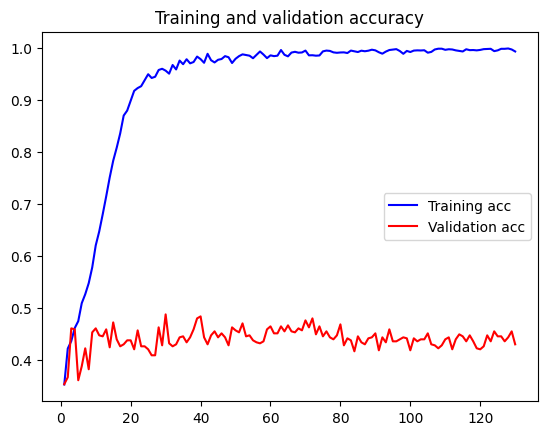

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

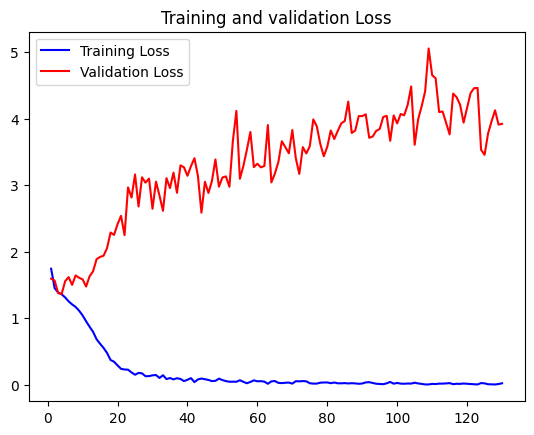

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

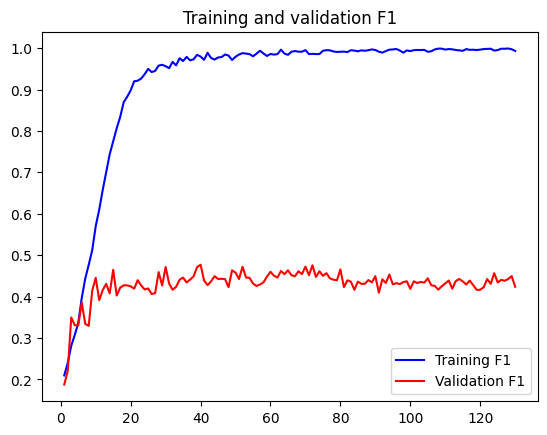

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs=range(1,len(save_metric.f1)+1)
plt.plot(epochs,save_metric.f1,'b',label='Training F1')
plt.plot(epochs,save_metric.val_f1,'r',label='Validation F1')
plt.title('Training and validation F1')
plt.legend()
plt.figure()

In [ ]:
model = create_model()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/crema_models2/paper_1d.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(X_test_normalized, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_oe, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 2s 11ms/step
              precision    recall  f1-score   support

           0       0.75      0.56      0.64       382
           1       0.42      0.39      0.40       381
           2       0.36      0.43      0.39       381
           3       0.42      0.38      0.40       382
           4       0.37      0.43      0.40       326
           5       0.46      0.50      0.48       381

    accuracy                           0.45      2233
   macro avg       0.46      0.45      0.45      2233
weighted avg       0.46      0.45      0.45      2233



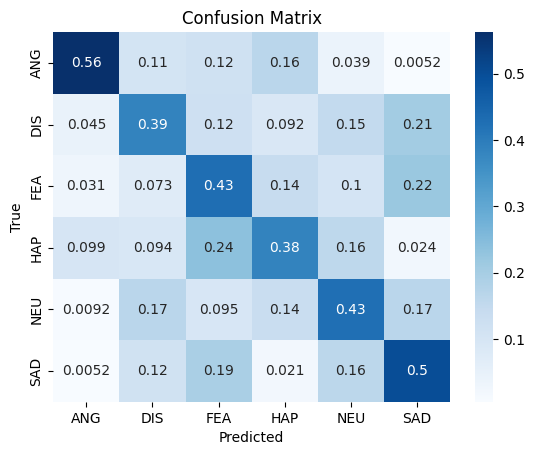

In [ ]:
# Label ANG mapped to 0
# Label DIS mapped to 1
# Label FEA mapped to 2
# Label HAP mapped to 3
# Label NEU mapped to 4
# Label SAD mapped to 5

# confusion matrix for test data

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Dropouts

### Model

In [ ]:
def create_model_dropout():
    model=Sequential()
    model.add(Conv1D(32, kernel_size=21, strides=1, padding='same', activation='relu', input_shape=(X_train_normalized.shape[1], 1)))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.3))

    model.add(Conv1D(64, kernel_size=19, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.4))

    model.add(Conv1D(128, kernel_size=17, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.4))

    model.add(Conv1D(256, kernel_size=15, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.4))

    model.add(Conv1D(512, kernel_size=13, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.4))

    model.add(Conv1D(1024, kernel_size=11, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.4))

    model.add(Conv1D(1024, kernel_size=9, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))

    model.add(Dense(6, activation='softmax'))
    opt=tensorflow.keras.optimizers.Adam(
      learning_rate=0.001,
      beta_1=0.9,
      beta_2=0.999,
    )
    model.compile(loss = 'categorical_crossentropy',optimizer=opt,metrics = ['accuracy',get_f1])
    return model


### Training

In [ ]:
# train model
model = create_model_dropout()
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=15, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/crema_models2/paper_1d_large_dropout.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

tensorflow.convert_to_tensor(X_train_normalized, dtype=tensorflow.float32)
cnn_results=model.fit(X_train_normalized, y_train_oe,
                      batch_size=32,
                      epochs=1000,
                      validation_data = (X_val_normalized,y_val_oe),
                      callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/1000
147/147 [==============================] - ETA: 0s - loss: 2.1660 - accuracy: 0.2274 - get_f1: 0.1235
Epoch 1: val_accuracy improved from -inf to 0.19770, saving model to /content/drive/MyDrive/Kaggle_ds/crema_models2/paper_1d_large_dropout.best.hdf5
147/147 [==============================] - 39s 37ms/step - loss: 2.1660 - accuracy: 0.2274 - get_f1: 0.1235 - val_loss: 1.7680 - val_accuracy: 0.1977 - val_get_f1: 0.0141 - lr: 0.0010
Epoch 2/1000
147/147 [==============================] - ETA: 0s - loss: 1.6594 - accuracy: 0.3002 - get_f1: 0.1294
Epoch 2: val_accuracy improved from 0.19770 to 0.30326, saving model to /content/drive/MyDrive/Kaggle_ds/crema_models2/paper_1d_large_dropout.best.hdf5
147/147 [==============================] - 5s 36ms/step - loss: 1.6594 - accuracy: 0.3002 - get_f1: 0.1294 - val_loss: 1.7193 - val_accuracy: 0.3033 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 3/1000
147/147 [==============================] - ETA: 0s - loss: 1.5996 - accuracy: 0.3217 

### Results

<Figure size 640x480 with 0 Axes>

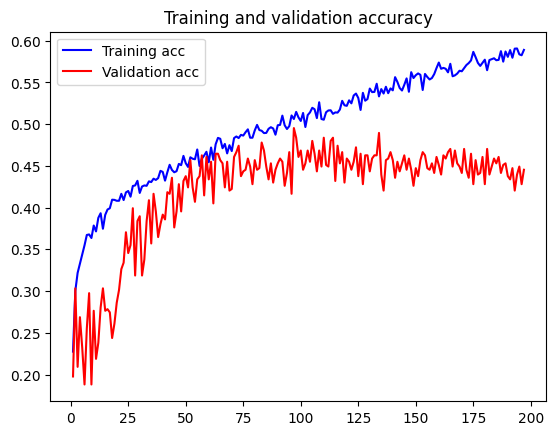

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

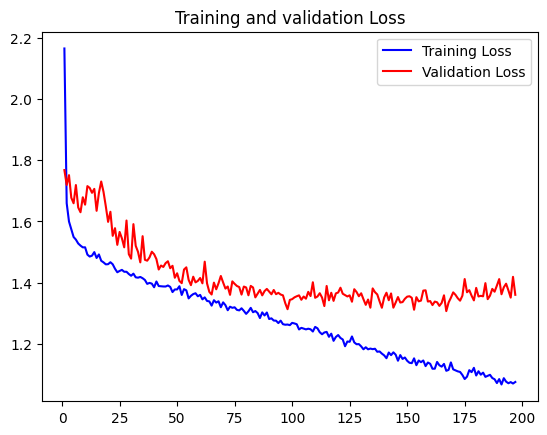

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

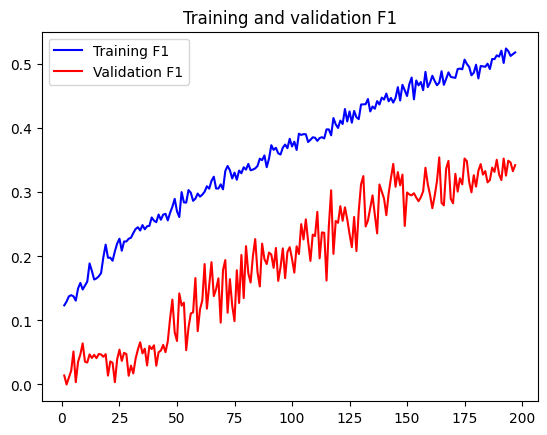

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs=range(1,len(save_metric.f1)+1)
plt.plot(epochs,save_metric.f1,'b',label='Training F1')
plt.plot(epochs,save_metric.val_f1,'r',label='Validation F1')
plt.title('Training and validation F1')
plt.legend()
plt.figure()

In [ ]:
model = create_model_dropout()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/crema_models2/paper_1d_large_dropout.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(X_test_normalized, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_oe, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

140/140 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       0.73      0.58      0.65       382
           1       0.54      0.26      0.35       381
           2       0.42      0.35      0.38       381
           3       0.39      0.56      0.46       382
           4       0.37      0.64      0.47       326
           5       0.63      0.50      0.56       381

    accuracy                           0.48      2233
   macro avg       0.51      0.48      0.48      2233
weighted avg       0.52      0.48      0.48      2233



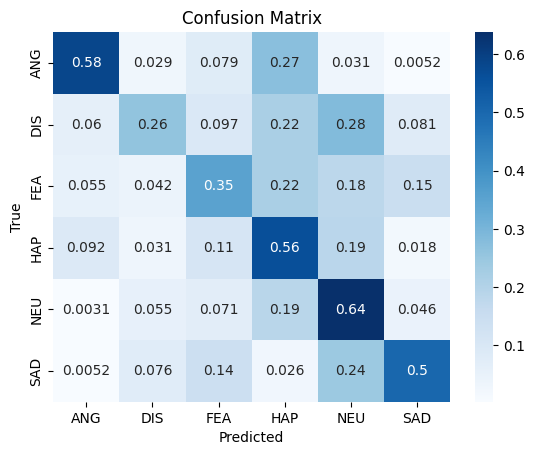

In [ ]:
# Label ANG mapped to 0
# Label DIS mapped to 1
# Label FEA mapped to 2
# Label HAP mapped to 3
# Label NEU mapped to 4
# Label SAD mapped to 5

# confusion matrix for test data

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# SAVEE

## Imports and downloading dataset

In [ ]:
import os
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import numpy as np
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.layers import Dense
import tensorflow
import tensorflow.keras
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, LeakyReLU
from keras.utils import np_utils
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

import keras
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization,MaxPooling1D,GlobalMaxPooling1D
import seaborn as sns
import random
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
from keras import backend as K
K._get_available_gpus()

['/device:GPU:0']

In [ ]:
from google.colab import drive

drive.mount("/content/drive")
DATASET_PATH = "/content/drive/MyDrive/Kaggle_ds/Savee/"

Mounted at /content/drive


In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content/drive/MyDrive/Kaggle_ds"

In [ ]:
if not os.path.exists("/content/drive/MyDrive/Kaggle_ds/"):
    os.makedirs("/content/drive/MyDrive/Kaggle_ds/")

In [ ]:
if len(os.listdir(os.environ["KAGGLE_CONFIG_DIR"])) == 1:
    !kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en -p /content/drive/MyDrive/Kaggle_ds --unzip

In [ ]:
%ls "/content/drive/MyDrive/Kaggle_ds/Savee/"

DC_a01.wav  DC_n21.wav   JE_f11.wav   JK_a01.wav  JK_n21.wav   KL_f11.wav
DC_a02.wav  DC_n22.wav   JE_f12.wav   JK_a02.wav  JK_n22.wav   KL_f12.wav
DC_a03.wav  DC_n23.wav   JE_f13.wav   JK_a03.wav  JK_n23.wav   KL_f13.wav
DC_a04.wav  DC_n24.wav   JE_f14.wav   JK_a04.wav  JK_n24.wav   KL_f14.wav
DC_a05.wav  DC_n25.wav   JE_f15.wav   JK_a05.wav  JK_n25.wav   KL_f15.wav
DC_a06.wav  DC_n26.wav   JE_h01.wav   JK_a06.wav  JK_n26.wav   KL_h01.wav
DC_a07.wav  DC_n27.wav   JE_h02.wav   JK_a07.wav  JK_n27.wav   KL_h02.wav
DC_a08.wav  DC_n28.wav   JE_h03.wav   JK_a08.wav  JK_n28.wav   KL_h03.wav
DC_a09.wav  DC_n29.wav   JE_h04.wav   JK_a09.wav  JK_n29.wav   KL_h04.wav
DC_a10.wav  DC_n30.wav   JE_h05.wav   JK_a10.wav  JK_n30.wav   KL_h05.wav
DC_a11.wav  DC_sa01.wav  JE_h06.wav   JK_a11.wav  JK_sa01.wav  KL_h06.wav
DC_a12.wav  DC_sa02.wav  JE_h07.wav   JK_a12.wav  JK_sa02.wav  KL_h07.wav
DC_a13.wav  DC_sa03.wav  JE_h08.wav   JK_a13.wav  JK_sa03.wav  KL_h08.wav
DC_a14.wav  DC_sa04.wav  JE_h09.wav   

In [ ]:
# Get all filenames into a list
dir_list: list[str] = os.listdir(DATASET_PATH)
dir_list.sort()
dir_list[:5]

['DC_a01.wav', 'DC_a02.wav', 'DC_a03.wav', 'DC_a04.wav', 'DC_a05.wav']

In [ ]:
path = []
gender = []
emotion = []

emotion_mapping = {
    'h'  : 'happy',
    'n'  : 'neutral',
    'sa' : 'sad',
    'su' : 'surprise',
    'a'  : 'angry',
    'f'  : 'fear',
    'd'  : 'disgust'
}

for filename in dir_list:
    part = filename.split('_')[1]
    key = part[:-6]
    if key in emotion_mapping:
        path.append(filename)
        gender.append('male') # male only dataset
        emotion.append(emotion_mapping[key])

savee_df = pd.concat([
    pd.DataFrame(path, columns=['path']),
    pd.DataFrame(gender, columns=['gender']),
    pd.DataFrame(emotion, columns=['emotion'])
], axis=1)

savee_df.head()

path gender emotion
0  DC_a01.wav   male   angry
1  DC_a02.wav   male   angry
2  DC_a03.wav   male   angry
3  DC_a04.wav   male   angry
4  DC_a05.wav   male   angry

In [ ]:
savee_df["emotion"].value_counts()

neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: emotion, dtype: int64

## Feature extraction

Feature extraction:
Kerkeni, Leila and Serrestou, Youssef and Raoof, Kosai and Cleder, ´
Catherine and Mahjoub, Mohamed and Mbarki, Mohamed, “Automatic
Speech Emotion Recognition Using Machine Learning,” March, 2019.
https://www.intechopen.com/chapters/65993

### Functions

In [ ]:
!pip install git+https://github.com/detly/gammatone.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/detly/gammatone.git to /tmp/pip-req-build-xf4iej6a
  Running command git clone --filter=blob:none --quiet https://github.com/detly/gammatone.git /tmp/pip-req-build-xf4iej6a
  Resolved https://github.com/detly/gammatone.git to commit 0626328ef7c31d3b33214db2fdcd52e8601eb4c5
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.4 MB/s eta 0:00:00
  Created wheel for Gammatone: filename=Gammatone-1.0-py3-none-any.whl size=21759 sha256=ac1961220ff2ecf096daf38875027b95c6fe4dc2e9a1d2c2c5733eacebad1c82
  Stored in directory: /tmp/pip-ephem-wheel-cache-gbnxksy6/wheels/1d/b4/36/1a03814cb85dffddc9345619ba6536cad7c21ae9820107fac6
Successfully built Gammatone


In [ ]:
from gammatone.filters import make_erb_filters, erb_filterbank, erb_space
from scipy.signal import hilbert, butter, sosfiltfilt

In [ ]:
def get_features_paper(filenames, n_mfcc: int = 12, n_mels: int = 19, n_modulation_filters: int = 5):
    np.random.seed(SEED)
    random.seed(SEED)
    all_features = np.zeros((len(filenames), (n_mfcc * 5 + n_mels * n_modulation_filters)))
    for i, filename in enumerate(filenames):
        if i % 100 == 0:
            print(f"{i}/{len(filenames)}")

        y, sr = librosa.load(DATASET_PATH+filename)
        desired_length = 8 * sr
        if len(y) < desired_length:
            y = np.pad(y, (0, desired_length - len(y)), mode='constant')

        # Extract the MFCC features
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        # Calculate the statistical measures for each MFCC coefficient
        mfcc_mean = np.mean(mfcc, axis=1)
        mfcc_var = np.var(mfcc, axis=1)
        mfcc_std = np.std(mfcc, axis=1)
        mfcc_kurtosis = stats.kurtosis(mfcc, axis=1)
        mfcc_skewness = stats.skew(mfcc, axis=1)
        # Concatenate the MFCC statistical measures into a single feature vector
        mfcc_features = np.hstack([mfcc_mean, mfcc_var, mfcc_std, mfcc_kurtosis, mfcc_skewness])

        # Decompose the speech signal using an auditory filter bank with n_mels filters
        cf = erb_space(20, sr/2, n_mels)
        b = make_erb_filters(sr, cf)
        filtered_signals = erb_filterbank(y, b)

        # Compute the Hilbert envelopes of the critical-band outputs
        hilbert_envelopes = np.abs(hilbert(filtered_signals))

        # Apply a modulation filter bank with n_modulation_filters filters to the Hilbert envelopes
        low_freq = 1
        high_freq = 10
        modulation_spectra = []
        for j in range(n_modulation_filters):
            # Design a bandpass filter for each modulation frequency band
            low = low_freq + j * (high_freq - low_freq) / n_modulation_filters
            high = low_freq + (j + 1) * (high_freq - low_freq) / n_modulation_filters
            sos = butter(4, [low / (sr / 2), high / (sr / 2)], 'band', output='sos')
            # Apply the bandpass filter to each Hilbert envelope
            filtered_envelopes = sosfiltfilt(sos, hilbert_envelopes)
            # Calculate the modulation spectrum by taking the mean of the filtered envelopes along the time axis
            modulation_spectrum = np.mean(filtered_envelopes, axis=1)
            modulation_spectra.append(modulation_spectrum)

        # Concatenate all modulation spectra into a single feature vector
        msf_features = np.hstack(modulation_spectra)


        # Concatenate the MFCC and MSF features into a single feature vector
        feature_vector = np.hstack([mfcc_features, msf_features])
        all_features[i] = feature_vector


    # Define the column names for the MFCC features
    mfcc_column_names = []
    for stat in ["mean", "var", "std", "kurtosis", "skewness"]:
        for i in range(n_mfcc):
            mfcc_column_names.append(f"mfcc{i+1}_{stat}")

    # Define the column names for the MSF features
    msf_column_names = [f'MSF_{i}' for i in range(1, n_mels * n_modulation_filters + 1)]
    column_names = mfcc_column_names + msf_column_names
    # Set the column names of the DataFrame
    all_features = pd.DataFrame(all_features, columns=column_names)

    return all_features

### Run

In [ ]:
EXIT
# if you intended to run this section, run the cells manually

In [ ]:
df_features = get_features_paper(savee_df["path"])

0/480
100/480
200/480
300/480
400/480


In [ ]:
df_features.sample(n=10, random_state=SEED)

mfcc1_mean  mfcc2_mean  mfcc3_mean  mfcc4_mean  mfcc5_mean  mfcc6_mean  \
73  -513.191223   78.850830   15.199884   31.962767   10.282919    4.764464   
414 -653.314758   44.652550    9.795897    5.362643   -3.907587   -4.805864   
394 -672.575378   45.415394    9.503453   14.144549    2.822232   -2.023962   
277 -385.005920   51.774326    4.736888   19.677418  -18.716345    4.618689   
399 -631.563049   29.368151    7.573493    7.538372    2.226041   -4.590499   
172 -421.725739   31.500906    2.618653   14.522537   -1.260501    0.800072   
268 -352.175812   87.812149    5.134069   18.602325    2.440355    0.628909   
375 -691.221069   52.548794   14.697536   22.751698    7.569712   -2.525072   
77  -601.563232   33.896183    5.601340    7.221142    7.448473   -0.719012   
442 -740.759583   44.816360   12.607388    9.089055    1.094296    0.003477   

     mfcc7_mean  mfcc8_mean  mfcc9_mean  mfcc10_mean  ...        MSF_86  \
73   -11.144742    1.949599    3.177915    -4.098508  ...  1.934159e-07   
414   -2.369165    1.503110   -4.264696    -6.228650  ...  7.148655e-08   
394   -2.550995    0.046868   -3.895542    -4.167922  ...  6.627757e-08   
277   -3.143289   -5.699800   -4.267196    -1.194110  ...  1.730737e-06   
399   -1.818452    0.682086   -3.265309    -3.642833  ...  7.669500e-08   
172   -7.071805   -2.630199   -2.292024    -0.542964  ... -2.849387e-07   
268   -3.382562   -2.933475   -4.973306    -3.087567  ... -3.545197e-06   
375   -6.075140    0.054801   -2.655132    -3.113413  ...  2.478145e-08   
77    -3.213407    2.529893    1.346305    -1.648021  ... -4.748278e-07   
442   -0.618171    0.022011   -2.667468    -3.905130  ... -3.069647e-08   

           MSF_87        MSF_88        MSF_89        MSF_90        MSF_91  \
73   3.851429e-07  1.110976e-07  1.184423e-07 -2.213243e-06  2.033149e-06   
414  1.352500e-07  1.920762e-07  2.704293e-07  3.833236e-07 -7.598505e-07   
394  6.679512e-08  1.859489e-07  3.995921e-07  7.321336e-07  4.547130e-07   
277  1.300274e-06  3.331028e-06  9.944743e-06  4.797417e-07 -5.043310e-06   
399 -1.212125e-08  7.130853e-08  4.409908e-08  2.493836e-06  4.505234e-07   
172  4.360457e-07  1.045042e-06 -7.646070e-07 -2.323742e-06 -1.788463e-07   
268 -6.737715e-06 -6.541779e-06  9.038095e-07  6.509125e-06 -1.814061e-06   
375  4.052365e-08  1.627350e-08 -1.729263e-07 -1.003236e-07  1.185571e-07   
77  -6.101938e-07 -1.428675e-06 -2.986128e-06  4.272551e-07  1.376752e-06   
442  3.263084e-08  1.491282e-08 -1.188053e-07  7.055483e-07  3.579091e-07   

           MSF_92        MSF_93        MSF_94        MSF_95  
73  -1.221019e-06 -2.174617e-06  7.138097e-07  4.255456e-06  
414  5.121018e-08 -5.977688e-08  1.595835e-08  1.046102e-07  
394  6.759437e-08 -8.546481e-08  2.976189e-08  1.561101e-07  
277 -9.949980e-07  2.662011e-07  8.540757e-07  4.398998e-06  
399 -3.885533e-07  1.060761e-07  2.278339e-08  1.626155e-07  
172  4.589236e-06  4.907869e-07  2.922905e-07  1.596274e-06  
268  3.722709e-06  8.068670e-07  8.811111e-07  4.325068e-06  
375  4.575079e-08  2.592712e-08  1.202107e-07  6.576521e-07  
77   1.102143e-06  2.513202e-07  9.385321e-07  4.593857e-06  
442  2.961002e-08  2.954209e-07  2.990729e-08  2.001080e-07  

[10 rows x 155 columns]

In [ ]:
df_features.to_feather("/content/drive/MyDrive/Kaggle_ds/features_savee/paper_features.feather")

## Loading features

In [ ]:
df_features = pd.read_feather("/content/drive/MyDrive/Kaggle_ds/features_savee/paper_features.feather")

In [ ]:
df_features.sample(n=10, random_state=SEED)

mfcc1_mean  mfcc2_mean  mfcc3_mean  mfcc4_mean  mfcc5_mean  mfcc6_mean  \
73  -513.191223   78.850830   15.199884   31.962767   10.282919    4.764464   
414 -653.314758   44.652550    9.795897    5.362643   -3.907587   -4.805864   
394 -672.575378   45.415394    9.503453   14.144549    2.822232   -2.023962   
277 -385.005920   51.774326    4.736888   19.677418  -18.716345    4.618689   
399 -631.563049   29.368151    7.573493    7.538372    2.226041   -4.590499   
172 -421.725739   31.500906    2.618653   14.522537   -1.260501    0.800072   
268 -352.175812   87.812149    5.134069   18.602325    2.440355    0.628909   
375 -691.221069   52.548794   14.697536   22.751698    7.569712   -2.525072   
77  -601.563232   33.896183    5.601340    7.221142    7.448473   -0.719012   
442 -740.759583   44.816360   12.607388    9.089055    1.094296    0.003477   

     mfcc7_mean  mfcc8_mean  mfcc9_mean  mfcc10_mean  ...        MSF_86  \
73   -11.144742    1.949599    3.177915    -4.098508  ...  1.934159e-07   
414   -2.369165    1.503110   -4.264696    -6.228650  ...  7.148655e-08   
394   -2.550995    0.046868   -3.895542    -4.167922  ...  6.627757e-08   
277   -3.143289   -5.699800   -4.267196    -1.194110  ...  1.730737e-06   
399   -1.818452    0.682086   -3.265309    -3.642833  ...  7.669500e-08   
172   -7.071805   -2.630199   -2.292024    -0.542964  ... -2.849387e-07   
268   -3.382562   -2.933475   -4.973306    -3.087567  ... -3.545197e-06   
375   -6.075140    0.054801   -2.655132    -3.113413  ...  2.478145e-08   
77    -3.213407    2.529893    1.346305    -1.648021  ... -4.748278e-07   
442   -0.618171    0.022011   -2.667468    -3.905130  ... -3.069647e-08   

           MSF_87        MSF_88        MSF_89        MSF_90        MSF_91  \
73   3.851429e-07  1.110976e-07  1.184423e-07 -2.213243e-06  2.033149e-06   
414  1.352500e-07  1.920762e-07  2.704293e-07  3.833236e-07 -7.598505e-07   
394  6.679512e-08  1.859489e-07  3.995921e-07  7.321336e-07  4.547130e-07   
277  1.300274e-06  3.331028e-06  9.944743e-06  4.797417e-07 -5.043310e-06   
399 -1.212125e-08  7.130853e-08  4.409908e-08  2.493836e-06  4.505234e-07   
172  4.360457e-07  1.045042e-06 -7.646070e-07 -2.323742e-06 -1.788463e-07   
268 -6.737715e-06 -6.541779e-06  9.038095e-07  6.509125e-06 -1.814061e-06   
375  4.052365e-08  1.627350e-08 -1.729263e-07 -1.003236e-07  1.185571e-07   
77  -6.101938e-07 -1.428675e-06 -2.986128e-06  4.272551e-07  1.376752e-06   
442  3.263084e-08  1.491282e-08 -1.188053e-07  7.055483e-07  3.579091e-07   

           MSF_92        MSF_93        MSF_94        MSF_95  
73  -1.221019e-06 -2.174617e-06  7.138097e-07  4.255456e-06  
414  5.121018e-08 -5.977688e-08  1.595835e-08  1.046102e-07  
394  6.759437e-08 -8.546481e-08  2.976189e-08  1.561101e-07  
277 -9.949980e-07  2.662011e-07  8.540757e-07  4.398998e-06  
399 -3.885533e-07  1.060761e-07  2.278339e-08  1.626155e-07  
172  4.589236e-06  4.907869e-07  2.922905e-07  1.596274e-06  
268  3.722709e-06  8.068670e-07  8.811111e-07  4.325068e-06  
375  4.575079e-08  2.592712e-08  1.202107e-07  6.576521e-07  
77   1.102143e-06  2.513202e-07  9.385321e-07  4.593857e-06  
442  2.961002e-08  2.954209e-07  2.990729e-08  2.001080e-07  

[10 rows x 155 columns]

## Data splitting

In [ ]:
lb = LabelEncoder()
savee_df["emotion"] = lb.fit_transform(savee_df["emotion"])
for i in range(len(lb.classes_)):
    print(f'Label {lb.classes_[i]} mapped to {i}')

Label angry mapped to 0
Label disgust mapped to 1
Label fear mapped to 2
Label happy mapped to 3
Label neutral mapped to 4
Label sad mapped to 5
Label surprise mapped to 6


In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(df_features, savee_df["emotion"], test_size=80/480, random_state=SEED, stratify=savee_df["emotion"], shuffle=True)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=SEED, stratify=y_train_val, shuffle=True)
print(len(X_train))
print(len(X_val))
print(len(X_test))

300
100
80


### One-Hot encoding labels

In [ ]:
y_train_oe = np_utils.to_categorical(y_train)
y_val_oe = np_utils.to_categorical(y_val)
y_test_oe = np_utils.to_categorical(y_test)

## Speaker Normalization

In [ ]:
# Calculate the mean and standard deviation of each feature column using only the training data
mean = X_train.mean()
std = X_train.std()

# Normalize the features in the training, validation and testing sets
X_train_normalized = (X_train - mean) / std
X_val_normalized = (X_val - mean) / std
X_test_normalized = (X_test - mean) / std

### Removing nan/inf

In [ ]:
# assuming your data is stored in a NumPy array called X_train
print("Number of nan values in X_train:", np.isnan(X_train_normalized).sum().sum())
print("Number of inf values in X_train:", np.isinf(X_train_normalized).sum().sum())

Number of nan values in X_train: 0
Number of inf values in X_train: 0


The one row that had an error during feature extraction

In [ ]:
# assuming your data is stored in a NumPy array called X_train
print("Number of nan values in X_val:", np.isnan(X_val_normalized).sum().sum())
print("Number of inf values in X_val:", np.isinf(X_val_normalized).sum().sum())

Number of nan values in X_val: 0
Number of inf values in X_val: 0


In [ ]:
# assuming your data is stored in a NumPy array called X_train
print("Number of nan values in X_test:", np.isnan(X_test_normalized).sum().sum())
print("Number of inf values in X_test:", np.isinf(X_test_normalized).sum().sum())

Number of nan values in X_test: 0
Number of inf values in X_test: 0


## Model callbacks

In [ ]:
def get_f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1

## Normal

### Model

In [ ]:
def create_model():
    model=Sequential()
    model.add(Conv1D(32, kernel_size=21, strides=1, padding='same', activation='relu', input_shape=(X_train_normalized.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(64, kernel_size=19, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(128, kernel_size=17, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(256, kernel_size=15, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(512, kernel_size=13, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=11, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=9, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dense(7, activation='softmax'))
    opt=tensorflow.keras.optimizers.Adam(
      learning_rate=0.001,
      beta_1=0.9,
      beta_2=0.999,
  )
    model.compile(loss = 'categorical_crossentropy',optimizer=opt,metrics = ['accuracy',get_f1])
    return model


### Training

In [ ]:
# train model
model = create_model()
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=15, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/savee_models/paper_1d.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

tensorflow.convert_to_tensor(X_train_normalized, dtype=tensorflow.float32)
cnn_results=model.fit(X_train_normalized, y_train_oe,
                      batch_size=16,
                      epochs=1000,
                      validation_data = (X_val_normalized,y_val_oe),
                      callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/1000
17/19 [=========================>....] - ETA: 0s - loss: 3.6395 - accuracy: 0.2500 - get_f1: 0.1835
Epoch 1: val_accuracy improved from -inf to 0.27000, saving model to /content/drive/MyDrive/Kaggle_ds/savee_models/paper_1d.best.hdf5
19/19 [==============================] - 13s 158ms/step - loss: 3.5579 - accuracy: 0.2500 - get_f1: 0.1781 - val_loss: 2.0571 - val_accuracy: 0.2700 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 2/1000
19/19 [==============================] - ETA: 0s - loss: 1.9255 - accuracy: 0.3033 - get_f1: 0.1897
Epoch 2: val_accuracy did not improve from 0.27000
19/19 [==============================] - 1s 33ms/step - loss: 1.9255 - accuracy: 0.3033 - get_f1: 0.1897 - val_loss: 1.9432 - val_accuracy: 0.2600 - val_get_f1: 0.0168 - lr: 0.0010
Epoch 3/1000
18/19 [===========================>..] - ETA: 0s - loss: 1.7221 - accuracy: 0.3715 - get_f1: 0.2980
Epoch 3: val_accuracy did not improve from 0.27000
19/19 [==============================] - 1s 28ms/step - l

### Results

<Figure size 640x480 with 0 Axes>

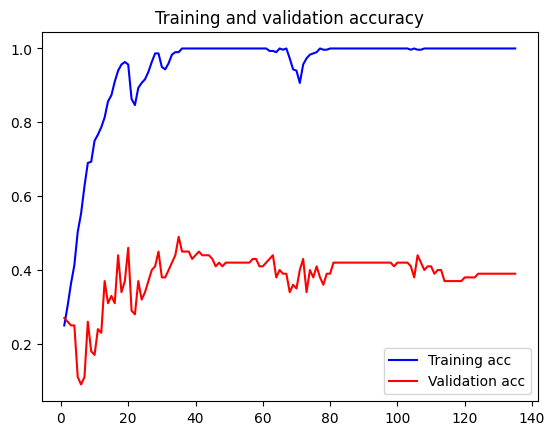

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

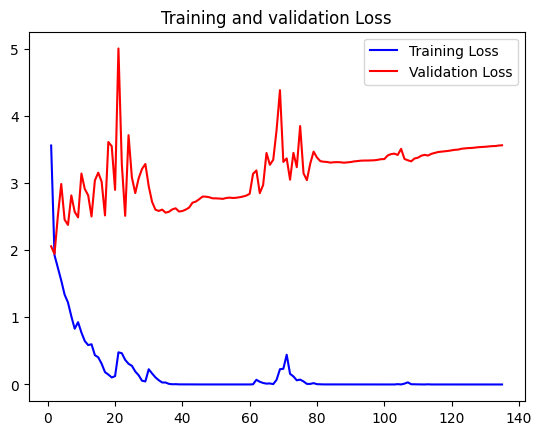

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

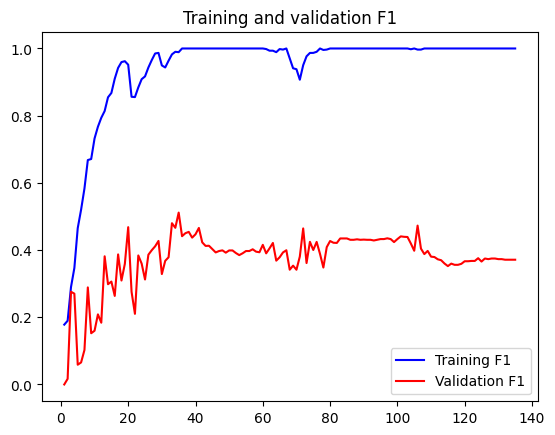

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs=range(1,len(save_metric.f1)+1)
plt.plot(epochs,save_metric.f1,'b',label='Training F1')
plt.plot(epochs,save_metric.val_f1,'r',label='Validation F1')
plt.title('Training and validation F1')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/savee_models/paper_1d.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(X_test_normalized, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_oe, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

5/5 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.38      0.50      0.43        10
           1       0.24      0.40      0.30        10
           2       0.62      0.50      0.56        10
           3       0.33      0.30      0.32        10
           4       0.61      0.70      0.65        20
           5       0.33      0.20      0.25        10
           6       0.75      0.30      0.43        10

    accuracy                           0.45        80
   macro avg       0.47      0.41      0.42        80
weighted avg       0.48      0.45      0.45        80



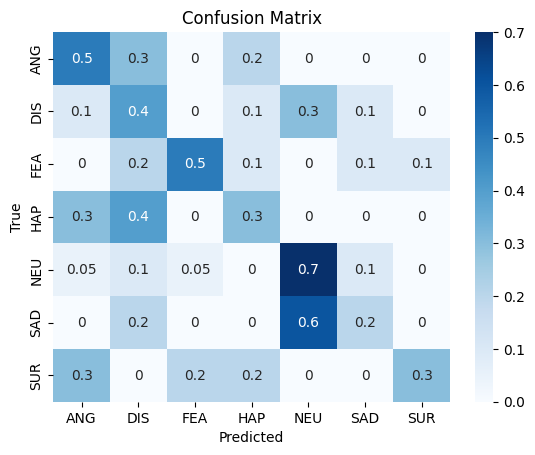

In [ ]:
# Label ANG mapped to 0
# Label DIS mapped to 1
# Label FEA mapped to 2
# Label HAP mapped to 3
# Label NEU mapped to 4
# Label SAD mapped to 5
# Label SUR mapped to 6

# confusion matrix for test data

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD','SUR'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD','SUR'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Dropouts

### Model

In [ ]:
def create_model_dropout():
    model=Sequential()
    model.add(Conv1D(32, kernel_size=21, strides=1, padding='same', activation='relu', input_shape=(X_train_normalized.shape[1], 1)))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.3))

    model.add(Conv1D(64, kernel_size=19, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.4))

    model.add(Conv1D(128, kernel_size=17, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.4))

    model.add(Conv1D(256, kernel_size=15, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.4))

    model.add(Conv1D(512, kernel_size=13, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.4))

    model.add(Conv1D(1024, kernel_size=11, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.4))

    model.add(Conv1D(1024, kernel_size=9, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))

    model.add(Dense(7, activation='softmax'))
    opt=tensorflow.keras.optimizers.Adam(
      learning_rate=0.001,
      beta_1=0.9,
      beta_2=0.999,
    )
    model.compile(loss = 'categorical_crossentropy',optimizer=opt,metrics = ['accuracy',get_f1])
    return model


### Training

In [ ]:
# train model
model = create_model_dropout()
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=15, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/savee_models/paper_1d_large_dropout.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

tensorflow.convert_to_tensor(X_train_normalized, dtype=tensorflow.float32)
cnn_results=model.fit(X_train_normalized, y_train_oe,
                      batch_size=16,
                      epochs=1000,
                      validation_data = (X_val_normalized,y_val_oe),
                      callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/1000
18/19 [===========================>..] - ETA: 0s - loss: 3.7666 - accuracy: 0.1910 - get_f1: 0.1523
Epoch 1: val_accuracy improved from -inf to 0.19000, saving model to /content/drive/MyDrive/Kaggle_ds/savee_models/paper_1d_large_dropout.best.hdf5
19/19 [==============================] - 13s 174ms/step - loss: 3.7520 - accuracy: 0.1867 - get_f1: 0.1443 - val_loss: 1.9556 - val_accuracy: 0.1900 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 2/1000
17/19 [=========================>....] - ETA: 0s - loss: 2.5855 - accuracy: 0.1654 - get_f1: 0.0980
Epoch 2: val_accuracy improved from 0.19000 to 0.25000, saving model to /content/drive/MyDrive/Kaggle_ds/savee_models/paper_1d_large_dropout.best.hdf5
19/19 [==============================] - 3s 173ms/step - loss: 2.5981 - accuracy: 0.1767 - get_f1: 0.0998 - val_loss: 2.0321 - val_accuracy: 0.2500 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 3/1000
18/19 [===========================>..] - ETA: 0s - loss: 2.1651 - accuracy: 0.2465 - get_

### Results

<Figure size 640x480 with 0 Axes>

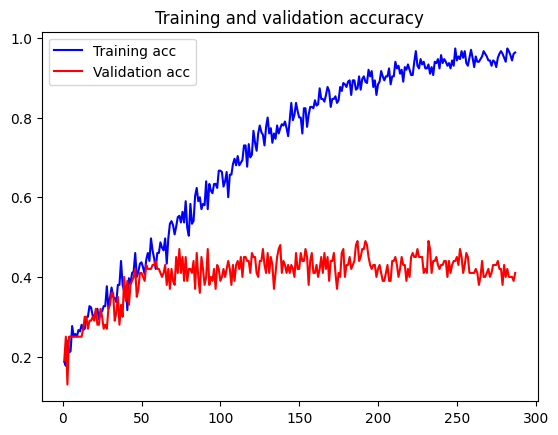

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

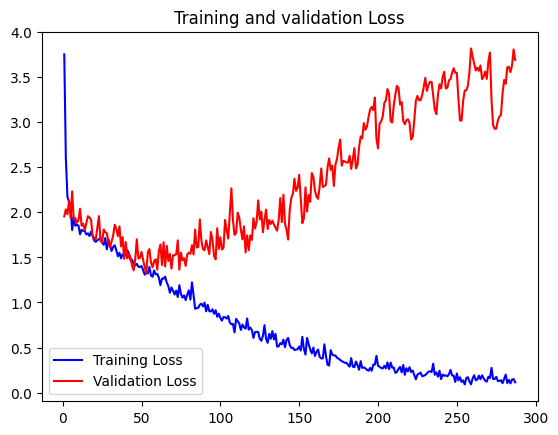

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

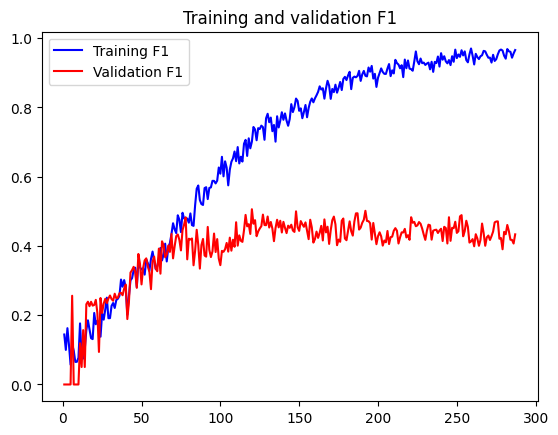

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs=range(1,len(save_metric.f1)+1)
plt.plot(epochs,save_metric.f1,'b',label='Training F1')
plt.plot(epochs,save_metric.val_f1,'r',label='Validation F1')
plt.title('Training and validation F1')
plt.legend()
plt.figure()

In [ ]:
model = create_model_dropout()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/savee_models/paper_1d_large_dropout.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(X_test_normalized, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_oe, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

5/5 [==============================] - 10s 6ms/step
              precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.42      0.50      0.45        10
           2       0.57      0.40      0.47        10
           3       0.29      0.40      0.33        10
           4       0.73      0.80      0.76        20
           5       0.60      0.30      0.40        10
           6       0.44      0.40      0.42        10

    accuracy                           0.51        80
   macro avg       0.50      0.47      0.47        80
weighted avg       0.53      0.51      0.51        80



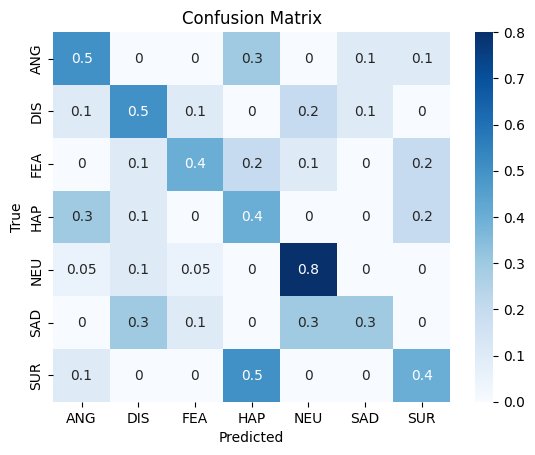

In [ ]:
# Label ANG mapped to 0
# Label DIS mapped to 1
# Label FEA mapped to 2
# Label HAP mapped to 3
# Label NEU mapped to 4
# Label SAD mapped to 5
# Label SUR mapped to 6

# confusion matrix for test data

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD','SUR'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD','SUR'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# SAVEE (different MSF extraction)

## Imports and downloading dataset

In [ ]:
import os
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import numpy as np
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.layers import Dense
import tensorflow
import tensorflow.keras
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, LeakyReLU
from keras.utils import np_utils
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

import keras
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization,MaxPooling1D,GlobalMaxPooling1D
import seaborn as sns
import random
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
from keras import backend as K
K._get_available_gpus()

['/device:GPU:0']

In [ ]:
from google.colab import drive

drive.mount("/content/drive")
DATASET_PATH = "/content/drive/MyDrive/Kaggle_ds/Savee/"

Mounted at /content/drive


In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content/drive/MyDrive/Kaggle_ds"

In [ ]:
if not os.path.exists("/content/drive/MyDrive/Kaggle_ds/"):
    os.makedirs("/content/drive/MyDrive/Kaggle_ds/")

In [ ]:
if len(os.listdir(os.environ["KAGGLE_CONFIG_DIR"])) == 1:
    !kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en -p /content/drive/MyDrive/Kaggle_ds --unzip

In [ ]:
%ls "/content/drive/MyDrive/Kaggle_ds/Savee/"

DC_a01.wav  DC_n21.wav   JE_f11.wav   JK_a01.wav  JK_n21.wav   KL_f11.wav
DC_a02.wav  DC_n22.wav   JE_f12.wav   JK_a02.wav  JK_n22.wav   KL_f12.wav
DC_a03.wav  DC_n23.wav   JE_f13.wav   JK_a03.wav  JK_n23.wav   KL_f13.wav
DC_a04.wav  DC_n24.wav   JE_f14.wav   JK_a04.wav  JK_n24.wav   KL_f14.wav
DC_a05.wav  DC_n25.wav   JE_f15.wav   JK_a05.wav  JK_n25.wav   KL_f15.wav
DC_a06.wav  DC_n26.wav   JE_h01.wav   JK_a06.wav  JK_n26.wav   KL_h01.wav
DC_a07.wav  DC_n27.wav   JE_h02.wav   JK_a07.wav  JK_n27.wav   KL_h02.wav
DC_a08.wav  DC_n28.wav   JE_h03.wav   JK_a08.wav  JK_n28.wav   KL_h03.wav
DC_a09.wav  DC_n29.wav   JE_h04.wav   JK_a09.wav  JK_n29.wav   KL_h04.wav
DC_a10.wav  DC_n30.wav   JE_h05.wav   JK_a10.wav  JK_n30.wav   KL_h05.wav
DC_a11.wav  DC_sa01.wav  JE_h06.wav   JK_a11.wav  JK_sa01.wav  KL_h06.wav
DC_a12.wav  DC_sa02.wav  JE_h07.wav   JK_a12.wav  JK_sa02.wav  KL_h07.wav
DC_a13.wav  DC_sa03.wav  JE_h08.wav   JK_a13.wav  JK_sa03.wav  KL_h08.wav
DC_a14.wav  DC_sa04.wav  JE_h09.wav   

In [ ]:
# Get all filenames into a list
dir_list: list[str] = os.listdir(DATASET_PATH)
dir_list.sort()
dir_list[:5]

['DC_a01.wav', 'DC_a02.wav', 'DC_a03.wav', 'DC_a04.wav', 'DC_a05.wav']

In [ ]:
path = []
gender = []
emotion = []

emotion_mapping = {
    'h'  : 'happy',
    'n'  : 'neutral',
    'sa' : 'sad',
    'su' : 'surprise',
    'a'  : 'angry',
    'f'  : 'fear',
    'd'  : 'disgust'
}

for filename in dir_list:
    part = filename.split('_')[1]
    key = part[:-6]
    if key in emotion_mapping:
        path.append(filename)
        gender.append('male') # male only dataset
        emotion.append(emotion_mapping[key])

savee_df = pd.concat([
    pd.DataFrame(path, columns=['path']),
    pd.DataFrame(gender, columns=['gender']),
    pd.DataFrame(emotion, columns=['emotion'])
], axis=1)

savee_df.head()

path gender emotion
0  DC_a01.wav   male   angry
1  DC_a02.wav   male   angry
2  DC_a03.wav   male   angry
3  DC_a04.wav   male   angry
4  DC_a05.wav   male   angry

In [ ]:
savee_df["emotion"].value_counts()

neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: emotion, dtype: int64

## Feature extraction

Feature extraction:
Kerkeni, Leila and Serrestou, Youssef and Raoof, Kosai and Cleder, ´
Catherine and Mahjoub, Mohamed and Mbarki, Mohamed, “Automatic
Speech Emotion Recognition Using Machine Learning,” March, 2019.
https://www.intechopen.com/chapters/65993

### Functions

In [ ]:
from scipy.signal import hilbert

In [ ]:
def get_features_paper(filenames, n_mfcc: int = 12, n_mels: int = 19, n_modulation_filters: int = 5):
    np.random.seed(SEED)
    random.seed(SEED)
    all_features = np.zeros((len(filenames), (n_mfcc * 5 + n_mels * n_modulation_filters)))
    for i, filename in enumerate(filenames):
        if i % 100 == 0:
            print(f"{i}/{len(filenames)}")

        y, sr = librosa.load(DATASET_PATH+filename)
        desired_length = 8 * sr
        if len(y) < desired_length:
            y = np.pad(y, (0, desired_length - len(y)), mode='constant')

        # Extract the MFCC features
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        # Calculate the statistical measures for each MFCC coefficient
        mfcc_mean = np.mean(mfcc, axis=1)
        mfcc_var = np.var(mfcc, axis=1)
        mfcc_std = np.std(mfcc, axis=1)
        mfcc_kurtosis = stats.kurtosis(mfcc, axis=1)
        mfcc_skewness = stats.skew(mfcc, axis=1)
        # Concatenate the MFCC statistical measures into a single feature vector
        mfcc_features = np.hstack([mfcc_mean, mfcc_var, mfcc_std, mfcc_kurtosis, mfcc_skewness])

        # Compute the spectrogram of the input signal
        spectrogram = np.abs(librosa.stft(y))

        # Decompose the speech signal using an auditory filterbank
        auditory_filterbank = librosa.filters.mel(sr=sr, n_fft=2048, n_mels=n_mels)
        decomposed_signal = np.dot(auditory_filterbank, spectrogram)

        # Compute the Hilbert envelopes of the critical-band outputs
        hilbert_envelopes = np.abs(librosa.core.stft(decomposed_signal))

        # Apply a modulation filterbank to each frame of the Hilbert envelopes
        modulation_filterbank = librosa.filters.mel(sr=sr, n_fft=2048, n_mels=n_modulation_filters)
        modulation_spectra = np.dot(modulation_filterbank, hilbert_envelopes.T).T

        # Measure the energy of the decomposed envelope signals
        energy = np.sum(modulation_spectra**2, axis=1)

        # Calculate MSFs from the ST representation
        msf_features = energy.reshape(n_mels*n_modulation_filters)

        # Concatenate the MFCC and MSF features into a single feature vector
        feature_vector = np.hstack([mfcc_features, msf_features])
        all_features[i] = feature_vector


    # Define the column names for the MFCC features
    mfcc_column_names = []
    for stat in ["mean", "var", "std", "kurtosis", "skewness"]:
        for i in range(n_mfcc):
            mfcc_column_names.append(f"mfcc{i+1}_{stat}")

    # Define the column names for the MSF features
    msf_column_names = [f'MSF_{i}' for i in range(1, n_mels * n_modulation_filters + 1)]
    column_names = mfcc_column_names + msf_column_names
    # Set the column names of the DataFrame
    all_features = pd.DataFrame(all_features, columns=column_names)

    return all_features

### Run

In [ ]:
EXIT
# if you intended to run this section, run the cells manually

In [ ]:
df_features = get_features_paper(savee_df["path"])

0/480


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=345
  warnings.warn(


100/480
200/480
300/480
400/480


In [ ]:
df_features.sample(n=10, random_state=SEED)

mfcc1_mean  mfcc2_mean  mfcc3_mean  mfcc4_mean  mfcc5_mean  mfcc6_mean  \
73  -513.191223   78.850830   15.199882   31.962767   10.282917    4.764465   
414 -653.314697   44.652550    9.795897    5.362644   -3.907588   -4.805863   
394 -672.575378   45.415394    9.503452   14.144551    2.822232   -2.023962   
277 -385.005920   51.774330    4.736887   19.677420  -18.716347    4.618690   
399 -631.563049   29.368156    7.573491    7.538374    2.226041   -4.590499   
172 -421.725739   31.500906    2.618653   14.522539   -1.260501    0.800073   
268 -352.175812   87.812157    5.134066   18.602329    2.440353    0.628910   
375 -691.221069   52.548801   14.697535   22.751696    7.569711   -2.525072   
77  -601.563232   33.896187    5.601339    7.221142    7.448472   -0.719012   
442 -740.759583   44.816360   12.607385    9.089054    1.094297    0.003477   

     mfcc7_mean  mfcc8_mean  mfcc9_mean  mfcc10_mean  ...        MSF_86  \
73   -11.144742    1.949600    3.177914    -4.098508  ...  7.888942e-06   
414   -2.369165    1.503111   -4.264696    -6.228650  ...  2.586634e-07   
394   -2.550995    0.046868   -3.895543    -4.167922  ...  3.953432e-08   
277   -3.143291   -5.699799   -4.267196    -1.194108  ...  2.747762e-04   
399   -1.818452    0.682086   -3.265309    -3.642833  ...  6.464657e-09   
172   -7.071805   -2.630199   -2.292024    -0.542964  ...  5.214523e-05   
268   -3.382562   -2.933475   -4.973306    -3.087566  ...  3.689003e-05   
375   -6.075140    0.054802   -2.655133    -3.113412  ...  4.857724e-07   
77    -3.213407    2.529893    1.346305    -1.648021  ...  3.143454e-07   
442   -0.618171    0.022011   -2.667468    -3.905131  ...  3.015343e-08   

           MSF_87        MSF_88        MSF_89        MSF_90        MSF_91  \
73   9.148861e-06  6.023795e-06  1.411684e-06  1.131757e-07  1.860933e-07   
414  1.990134e-07  1.056210e-07  3.399749e-08  1.756123e-09  2.307949e-09   
394  6.619405e-08  6.287672e-08  2.005163e-08  3.051455e-09  7.845103e-10   
277  2.106924e-04  1.799871e-04  3.999353e-05  4.444535e-06  2.907276e-06   
399  1.339052e-09  1.064623e-09  5.999208e-10  7.806041e-11  6.956497e-10   
172  2.967844e-05  2.602284e-05  4.418187e-06  3.878156e-07  3.999107e-07   
268  1.552091e-05  2.968368e-05  8.369751e-06  1.142100e-06  1.940216e-06   
375  4.256104e-07  1.333424e-07  1.936455e-08  1.410520e-09  4.500003e-09   
77   2.498658e-07  1.998034e-07  1.155518e-07  3.323590e-08  1.782373e-07   
442  2.002154e-08  1.540635e-08  5.530017e-09  4.087571e-10  7.229020e-10   

           MSF_92        MSF_93        MSF_94        MSF_95  
73   1.857438e-07  1.611217e-07  8.862392e-08  2.366235e-08  
414  1.303680e-09  6.625382e-10  2.843384e-10  4.423624e-11  
394  3.656006e-10  3.100726e-10  1.478669e-10  3.549754e-11  
277  2.393585e-06  1.543678e-06  5.941699e-07  1.461523e-07  
399  1.097986e-10  6.982909e-11  3.560306e-11  1.275821e-11  
172  2.436512e-07  1.905249e-07  6.329498e-08  8.376600e-09  
268  1.122469e-06  1.870323e-06  4.645495e-07  6.760855e-08  
375  3.246919e-09  2.058923e-09  1.104124e-09  3.183800e-10  
77   1.678668e-07  1.448781e-07  9.382734e-08  2.552097e-08  
442  1.746110e-10  1.091599e-10  4.940485e-11  1.336348e-11  

[10 rows x 155 columns]

In [ ]:
df_features.to_feather("/content/drive/MyDrive/Kaggle_ds/features_savee2/paper_features.feather")

## Loading features

In [ ]:
df_features = pd.read_feather("/content/drive/MyDrive/Kaggle_ds/features_savee2/paper_features.feather")

In [ ]:
df_features.sample(n=10, random_state=SEED)

mfcc1_mean  mfcc2_mean  mfcc3_mean  mfcc4_mean  mfcc5_mean  mfcc6_mean  \
73  -513.191223   78.850830   15.199882   31.962767   10.282917    4.764465   
414 -653.314697   44.652550    9.795897    5.362644   -3.907588   -4.805863   
394 -672.575378   45.415394    9.503452   14.144551    2.822232   -2.023962   
277 -385.005920   51.774330    4.736887   19.677420  -18.716347    4.618690   
399 -631.563049   29.368156    7.573491    7.538374    2.226041   -4.590499   
172 -421.725739   31.500906    2.618653   14.522539   -1.260501    0.800073   
268 -352.175812   87.812157    5.134066   18.602329    2.440353    0.628910   
375 -691.221069   52.548801   14.697535   22.751696    7.569711   -2.525072   
77  -601.563232   33.896187    5.601339    7.221142    7.448472   -0.719012   
442 -740.759583   44.816360   12.607385    9.089054    1.094297    0.003477   

     mfcc7_mean  mfcc8_mean  mfcc9_mean  mfcc10_mean  ...        MSF_86  \
73   -11.144742    1.949600    3.177914    -4.098508  ...  7.888942e-06   
414   -2.369165    1.503111   -4.264696    -6.228650  ...  2.586634e-07   
394   -2.550995    0.046868   -3.895543    -4.167922  ...  3.953432e-08   
277   -3.143291   -5.699799   -4.267196    -1.194108  ...  2.747762e-04   
399   -1.818452    0.682086   -3.265309    -3.642833  ...  6.464657e-09   
172   -7.071805   -2.630199   -2.292024    -0.542964  ...  5.214523e-05   
268   -3.382562   -2.933475   -4.973306    -3.087566  ...  3.689003e-05   
375   -6.075140    0.054802   -2.655133    -3.113412  ...  4.857724e-07   
77    -3.213407    2.529893    1.346305    -1.648021  ...  3.143454e-07   
442   -0.618171    0.022011   -2.667468    -3.905131  ...  3.015343e-08   

           MSF_87        MSF_88        MSF_89        MSF_90        MSF_91  \
73   9.148861e-06  6.023795e-06  1.411684e-06  1.131757e-07  1.860933e-07   
414  1.990134e-07  1.056210e-07  3.399749e-08  1.756123e-09  2.307949e-09   
394  6.619405e-08  6.287672e-08  2.005163e-08  3.051455e-09  7.845103e-10   
277  2.106924e-04  1.799871e-04  3.999353e-05  4.444535e-06  2.907276e-06   
399  1.339052e-09  1.064623e-09  5.999208e-10  7.806041e-11  6.956497e-10   
172  2.967844e-05  2.602284e-05  4.418187e-06  3.878156e-07  3.999107e-07   
268  1.552091e-05  2.968368e-05  8.369751e-06  1.142100e-06  1.940216e-06   
375  4.256104e-07  1.333424e-07  1.936455e-08  1.410520e-09  4.500003e-09   
77   2.498658e-07  1.998034e-07  1.155518e-07  3.323590e-08  1.782373e-07   
442  2.002154e-08  1.540635e-08  5.530017e-09  4.087571e-10  7.229020e-10   

           MSF_92        MSF_93        MSF_94        MSF_95  
73   1.857438e-07  1.611217e-07  8.862392e-08  2.366235e-08  
414  1.303680e-09  6.625382e-10  2.843384e-10  4.423624e-11  
394  3.656006e-10  3.100726e-10  1.478669e-10  3.549754e-11  
277  2.393585e-06  1.543678e-06  5.941699e-07  1.461523e-07  
399  1.097986e-10  6.982909e-11  3.560306e-11  1.275821e-11  
172  2.436512e-07  1.905249e-07  6.329498e-08  8.376600e-09  
268  1.122469e-06  1.870323e-06  4.645495e-07  6.760855e-08  
375  3.246919e-09  2.058923e-09  1.104124e-09  3.183800e-10  
77   1.678668e-07  1.448781e-07  9.382734e-08  2.552097e-08  
442  1.746110e-10  1.091599e-10  4.940485e-11  1.336348e-11  

[10 rows x 155 columns]

## Data splitting

In [ ]:
lb = LabelEncoder()
savee_df["emotion"] = lb.fit_transform(savee_df["emotion"])
for i in range(len(lb.classes_)):
    print(f'Label {lb.classes_[i]} mapped to {i}')

Label angry mapped to 0
Label disgust mapped to 1
Label fear mapped to 2
Label happy mapped to 3
Label neutral mapped to 4
Label sad mapped to 5
Label surprise mapped to 6


In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(df_features, savee_df["emotion"], test_size=80/480, random_state=SEED, stratify=savee_df["emotion"], shuffle=True)
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=SEED, stratify=y_train_val, shuffle=True)
print(len(X_train))
print(len(X_val))
print(len(X_test))

300
100
80


### One-Hot encoding labels

In [ ]:
y_train_oe = np_utils.to_categorical(y_train)
y_val_oe = np_utils.to_categorical(y_val)
y_test_oe = np_utils.to_categorical(y_test)

## Speaker Normalization

In [ ]:
# Calculate the mean and standard deviation of each feature column using only the training data
mean = X_train.mean()
std = X_train.std()

# Normalize the features in the training, validation and testing sets
X_train_normalized = (X_train - mean) / std
X_val_normalized = (X_val - mean) / std
X_test_normalized = (X_test - mean) / std

### Removing nan/inf

In [ ]:
# assuming your data is stored in a NumPy array called X_train
print("Number of nan values in X_train:", np.isnan(X_train_normalized).sum().sum())
print("Number of inf values in X_train:", np.isinf(X_train_normalized).sum().sum())

Number of nan values in X_train: 0
Number of inf values in X_train: 0


The one row that had an error during feature extraction

In [ ]:
# assuming your data is stored in a NumPy array called X_train
print("Number of nan values in X_val:", np.isnan(X_val_normalized).sum().sum())
print("Number of inf values in X_val:", np.isinf(X_val_normalized).sum().sum())

Number of nan values in X_val: 0
Number of inf values in X_val: 0


In [ ]:
# assuming your data is stored in a NumPy array called X_train
print("Number of nan values in X_test:", np.isnan(X_test_normalized).sum().sum())
print("Number of inf values in X_test:", np.isinf(X_test_normalized).sum().sum())

Number of nan values in X_test: 0
Number of inf values in X_test: 0


## Model callbacks

In [ ]:
def get_f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
# call back function after epoch end for storing accuracy and loss and f1 score trainig and validation
class myCallback(tensorflow.keras.callbacks.Callback):
    accuracy = []
    val_accuracy = []
    loss = []
    val_loss = []
    f1 = []
    val_f1 = []
    epoch_num = 0
    def __init__(self, logs={}):
        self.accuracy = []
        self.val_accuracy = []
        self.loss = []
        self.val_loss = []
        self.f1 = []
        self.val_f1 = []
        self.epoch_num = 0

    def on_epoch_end(self,epoch,logs={}):
        # get current accuracy and loss
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')
        current_loss = logs.get('loss')
        current_val_loss = logs.get('val_loss')
        current_f1 = logs.get('get_f1')
        current_val_f1 = logs.get('val_get_f1')

        # append current accuracy and loss to lists
        self.accuracy.append(current_accuracy)
        self.val_accuracy.append(current_val_accuracy)
        self.loss.append(current_loss)
        self.val_loss.append(current_val_loss)
        self.f1.append(current_f1)
        self.val_f1.append(current_val_f1)

        # update epoch number
        self.epoch_num = self.epoch_num + 1

## Normal

### Model

In [ ]:
def create_model():
    model=Sequential()
    model.add(Conv1D(32, kernel_size=21, strides=1, padding='same', activation='relu', input_shape=(X_train_normalized.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(64, kernel_size=19, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(128, kernel_size=17, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(256, kernel_size=15, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(512, kernel_size=13, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=11, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

    model.add(Conv1D(1024, kernel_size=9, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dense(7, activation='softmax'))
    opt=tensorflow.keras.optimizers.Adam(
      learning_rate=0.001,
      beta_1=0.9,
      beta_2=0.999,
  )
    model.compile(loss = 'categorical_crossentropy',optimizer=opt,metrics = ['accuracy',get_f1])
    return model


### Training

In [ ]:
# train model
model = create_model()
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=15, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/savee_models2/paper_1d.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

tensorflow.convert_to_tensor(X_train_normalized, dtype=tensorflow.float32)
cnn_results=model.fit(X_train_normalized, y_train_oe,
                      batch_size=4,
                      epochs=1000,
                      validation_data = (X_val_normalized,y_val_oe),
                      callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/1000
 5/75 [=>............................] - ETA: 1s - loss: 5.7123 - accuracy: 0.3000 - get_f1: 0.3167

73/75 [============================>.] - ETA: 0s - loss: 2.8169 - accuracy: 0.2705 - get_f1: 0.1533
Epoch 1: val_accuracy improved from -inf to 0.16000, saving model to /content/drive/MyDrive/Kaggle_ds/savee_models2/paper_1d.best.hdf5
75/75 [==============================] - 14s 55ms/step - loss: 2.7765 - accuracy: 0.2767 - get_f1: 0.1492 - val_loss: 2.7159 - val_accuracy: 0.1600 - val_get_f1: 0.0824 - lr: 0.0010
Epoch 2/1000
73/75 [============================>.] - ETA: 0s - loss: 1.9388 - accuracy: 0.2774 - get_f1: 0.1539
Epoch 2: val_accuracy did not improve from 0.16000
75/75 [==============================] - 2s 24ms/step - loss: 1.9477 - accuracy: 0.2767 - get_f1: 0.1575 - val_loss: 2.7244 - val_accuracy: 0.1300 - val_get_f1: 0.0160 - lr: 0.0010
Epoch 3/1000
73/75 [============================>.] - ETA: 0s - loss: 1.7735 - accuracy: 0.3425 - get_f1: 0.1434
Epoch 3: val_accuracy improved from 0.16000 to 0.34000, saving model to /content/drive/MyDrive/Kaggle_ds/savee_models2/paper_

### Results

<Figure size 640x480 with 0 Axes>

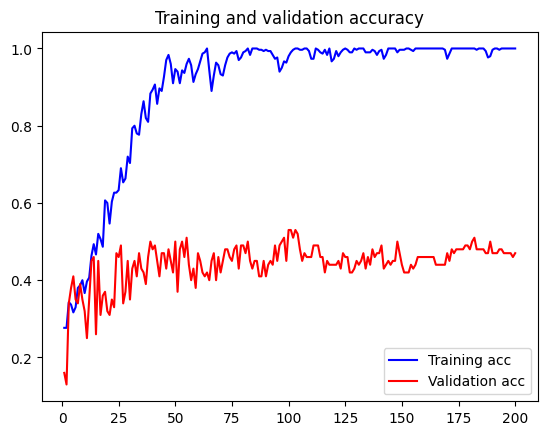

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

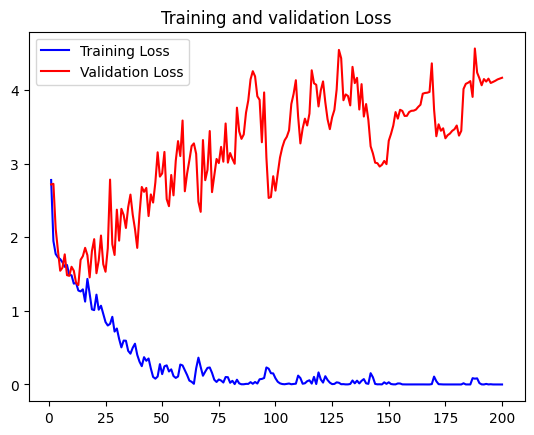

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

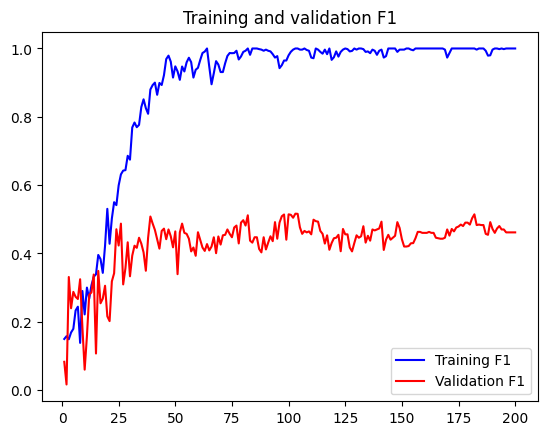

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs=range(1,len(save_metric.f1)+1)
plt.plot(epochs,save_metric.f1,'b',label='Training F1')
plt.plot(epochs,save_metric.val_f1,'r',label='Validation F1')
plt.title('Training and validation F1')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/savee_models2/paper_1d.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(X_test_normalized, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_oe, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

5/5 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.41      0.70      0.52        10
           1       0.73      0.80      0.76        10
           2       0.46      0.60      0.52        10
           3       0.50      0.40      0.44        10
           4       0.79      0.75      0.77        20
           5       0.50      0.30      0.37        10
           6       0.83      0.50      0.62        10

    accuracy                           0.60        80
   macro avg       0.60      0.58      0.57        80
weighted avg       0.63      0.60      0.60        80



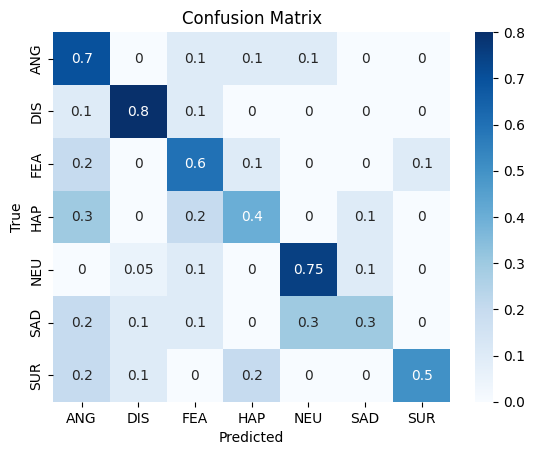

In [ ]:
# Label ANG mapped to 0
# Label DIS mapped to 1
# Label FEA mapped to 2
# Label HAP mapped to 3
# Label NEU mapped to 4
# Label SAD mapped to 5
# Label SUR mapped to 6

# confusion matrix for test data

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD','SUR'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD','SUR'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Dropouts

### Model

In [ ]:
def create_model_dropout():
    model=Sequential()
    model.add(Conv1D(32, kernel_size=21, strides=1, padding='same', activation='relu', input_shape=(X_train_normalized.shape[1], 1)))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.3))

    model.add(Conv1D(64, kernel_size=19, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.4))

    model.add(Conv1D(128, kernel_size=17, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.4))

    model.add(Conv1D(256, kernel_size=15, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.4))

    model.add(Conv1D(512, kernel_size=13, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.4))

    model.add(Conv1D(1024, kernel_size=11, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
    model.add(Dropout(0.4))

    model.add(Conv1D(1024, kernel_size=9, strides=1, padding='same', activation='relu'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))

    model.add(Dense(7, activation='softmax'))
    opt=tensorflow.keras.optimizers.Adam(
      learning_rate=0.001,
      beta_1=0.9,
      beta_2=0.999,
    )
    model.compile(loss = 'categorical_crossentropy',optimizer=opt,metrics = ['accuracy',get_f1])
    return model


### Training

In [ ]:
# train model
model = create_model_dropout()
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=15, min_lr=0.000001)
save_metric = myCallback()
es = EarlyStopping(monitor='val_accuracy', patience=100)
filepath="/content/drive/MyDrive/Kaggle_ds/savee_models2/paper_1d_large_dropout.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

tensorflow.convert_to_tensor(X_train_normalized, dtype=tensorflow.float32)
cnn_results=model.fit(X_train_normalized, y_train_oe,
                      batch_size=8,
                      epochs=1000,
                      validation_data = (X_val_normalized,y_val_oe),
                      callbacks=[lr_reduce,checkpoint,es,save_metric])

Epoch 1/1000
37/38 [============================>.] - ETA: 0s - loss: 3.9904 - accuracy: 0.1757 - get_f1: 0.1439
Epoch 1: val_accuracy improved from -inf to 0.12000, saving model to /content/drive/MyDrive/Kaggle_ds/savee_models2/paper_1d_large_dropout.best.hdf5
38/38 [==============================] - 11s 89ms/step - loss: 3.9721 - accuracy: 0.1767 - get_f1: 0.1401 - val_loss: 2.0785 - val_accuracy: 0.1200 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 2/1000
36/38 [===========================>..] - ETA: 0s - loss: 2.8905 - accuracy: 0.2326 - get_f1: 0.1827
Epoch 2: val_accuracy improved from 0.12000 to 0.17000, saving model to /content/drive/MyDrive/Kaggle_ds/savee_models2/paper_1d_large_dropout.best.hdf5
38/38 [==============================] - 4s 98ms/step - loss: 2.9220 - accuracy: 0.2267 - get_f1: 0.1774 - val_loss: 1.9554 - val_accuracy: 0.1700 - val_get_f1: 0.0000e+00 - lr: 0.0010
Epoch 3/1000
38/38 [==============================] - ETA: 0s - loss: 2.4299 - accuracy: 0.1933 - get_

### Results

<Figure size 640x480 with 0 Axes>

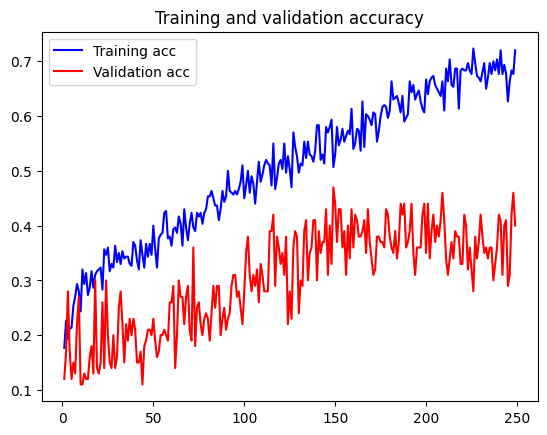

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.accuracy) + 1)
plt.plot(epochs, save_metric.accuracy, 'b', label='Training acc')
plt.plot(epochs, save_metric.val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

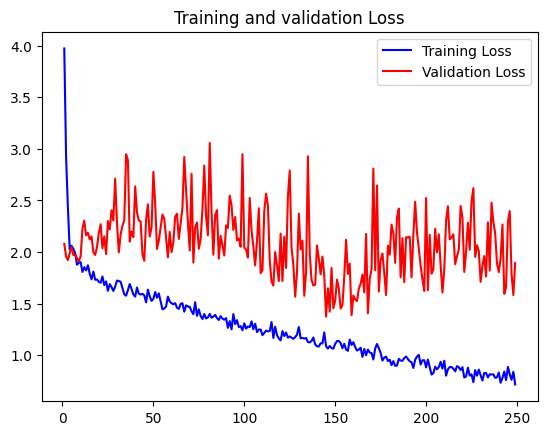

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1, len(save_metric.loss) + 1)
plt.plot(epochs, save_metric.loss, 'b', label='Training Loss')
plt.plot(epochs, save_metric.val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

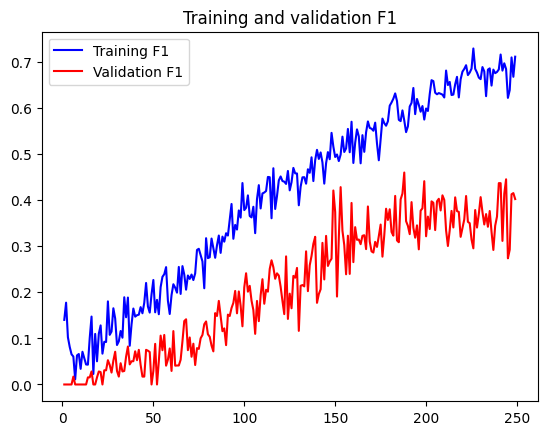

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs=range(1,len(save_metric.f1)+1)
plt.plot(epochs,save_metric.f1,'b',label='Training F1')
plt.plot(epochs,save_metric.val_f1,'r',label='Validation F1')
plt.title('Training and validation F1')
plt.legend()
plt.figure()

In [ ]:
# reload the best model
filepath="/content/drive/MyDrive/Kaggle_ds/savee_models2/paper_1d_large_dropout.best.hdf5"

model.load_weights(filepath)

# evaluate model on test data

from sklearn.metrics import classification_report

y_pred = model.predict(X_test_normalized, batch_size=16, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_bool = np.argmax(y_test_oe, axis=1)
print(classification_report(y_test_bool, y_pred_bool))

5/5 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        10
           1       0.44      0.40      0.42        10
           2       0.29      0.50      0.37        10
           3       0.17      0.10      0.12        10
           4       0.71      0.85      0.77        20
           5       0.25      0.20      0.22        10
           6       0.25      0.10      0.14        10

    accuracy                           0.45        80
   macro avg       0.37      0.39      0.37        80
weighted avg       0.42      0.45      0.42        80



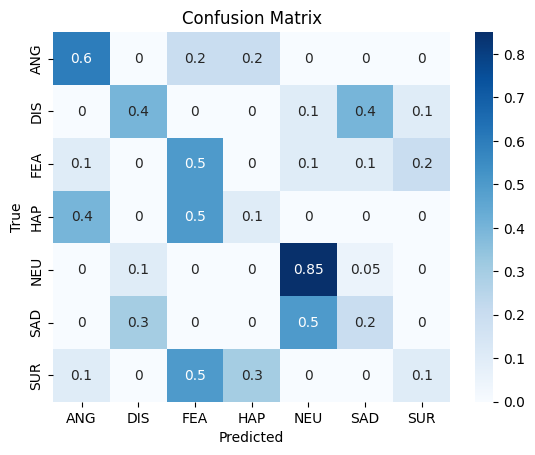

In [ ]:
# Label ANG mapped to 0
# Label DIS mapped to 1
# Label FEA mapped to 2
# Label HAP mapped to 3
# Label NEU mapped to 4
# Label SAD mapped to 5
# Label SUR mapped to 6

# confusion matrix for test data

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_bool, y_pred_bool)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['ANG','DIS','FEA','HAP','NEU','SAD','SUR'],yticklabels=['ANG','DIS','FEA','HAP','NEU','SAD','SUR'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()